# Phân tích tác dụng các loại thuốc chống trầm cảm

Thành viên:
- 23C24004 - Lê Nhựt Nam
- 23C24005 - Phạm Thừa Tiểu Thành

**Ngữ cảnh vấn đề**: Trong thời đại kỹ thuật số, mạng xã hội đã trở thành một phần không thể thiếu của cuộc sống hàng ngày. Các nền tảng như Facebook, Twitter, Instagram, LinkedIn, và TikTok không chỉ là nơi để kết nối bạn bè mà còn là môi trường quan trọng để doanh nghiệp tương tác với khách hàng, chính trị gia tiếp cận cử tri, và các nhà hoạt động xã hội lan tỏa thông điệp của họ.

## Dẫn nhập

Phân tích tương tác trên mạng xã hội là quá trình thu thập, phân tích và diễn giải các dữ liệu về hành vi của người dùng, bao gồm các lượt thích, chia sẻ, bình luận, và các loại tương tác khác. Bài toán đặt ra là cần hiểu rõ tầm quan trọng của việc phân tích này để từ đó tối ưu hóa các chiến lược truyền thông, tiếp thị, và xây dựng thương hiệu.

## Import thư viện

In [ ]:
install.packages("phia")
install.packages("nortest")
install.packages("lmtest")
install.packages("emmeans")
library(emmeans)
library(lmtest)
library(ggplot2)
library(phia)
library(car)
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’


Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: car

Loading required package: carData



## Đọc hiểu dữ liệu

In [ ]:
data_path = "/content/dataset_Facebook.csv"
fb_raw = read.csv(data_path, header = TRUE, sep = ";", stringsAsFactors = FALSE)

# Kiểm tra thông tin về tên biến và kiểu dữ liệu
str(fb_raw)

# Kiểm tra chiều dư liệu
dim(fb_raw)

'data.frame':	500 obs. of  19 variables:
 $ Page.total.likes                                                   : int  139441 139441 139441 139441 139441 139441 139441 139441 139441 139441 ...
 $ Type                                                               : chr  "Photo" "Status" "Photo" "Photo" ...
 $ Category                                                           : int  2 2 3 2 2 2 3 3 2 3 ...
 $ Post.Month                                                         : int  12 12 12 12 12 12 12 12 12 12 ...
 $ Post.Weekday                                                       : int  4 3 3 2 2 1 1 7 7 6 ...
 $ Post.Hour                                                          : int  3 10 3 10 3 9 3 9 3 10 ...
 $ Paid                                                               : int  0 0 0 1 0 0 1 1 0 0 ...
 $ Lifetime.Post.Total.Reach                                          : int  2752 10460 2413 50128 7244 10472 11692 13720 11844 4694 ...
 $ Lifetime.Post.Total.Impressions     

[1] 500  19

Thông tin về các biến của bộ dữ liệu như sau

| Variable Name                        | Role    | Type        | Description                                                                                              | Units | Missing Values |
|--------------------------------------|---------|-------------|----------------------------------------------------------------------------------------------------------|-------|----------------|
| Page total likes                    | Feature | Integer     | Tổng số lượt thích của bài viết trên trang.                                                           |       | no             |
| Type                                | Feature | Categorical | Loại bài viết hoặc quảng cáo (ví dụ: hình ảnh, video, bài viết).                                       |       | no             |
| Category                            | Feature | Integer     | Danh mục của bài viết hoặc quảng cáo (có thể là mã số của các loại danh mục khác nhau).                |       | no             |
| Post Month                           | Feature | Integer     | Tháng mà bài viết được đăng.                                                                            |       | no             |
| Post Weekday                         | Feature | Integer     | Ngày trong tuần mà bài viết được đăng (0 = Chủ Nhật, 1 = Thứ Hai, v.v.).                               |       | no             |
| Post Hour                            | Feature | Integer     | Giờ trong ngày mà bài viết được đăng (0-23).                                                            |       | no             |
| Paid                                | Feature | Continuous  | Chi phí quảng cáo cho bài viết hoặc quảng cáo (có thể là chi phí phải trả hoặc số tiền đã chi).       |       | no             |
| Lifetime Post Total Reach            | Feature | Integer     | Tổng số người tiếp cận bài viết trong suốt thời gian bài viết được đăng.                              |       | no             |
| Lifetime Post Total Impressions      | Feature | Integer     | Tổng số lần bài viết được nhìn thấy trong suốt thời gian bài viết được đăng.                          |       | no             |
| Lifetime Engaged Users               | Feature | Integer     | Tổng số người đã tương tác với bài viết (như lượt thích, bình luận, chia sẻ) trong suốt thời gian.    |       | no             |


Trong đó, các biến Post, Lifetime sẽ được chia thành các phần nhỏ hơn (có giải thích chi tiết ở trên).

Có tất cả 500 samples


## Phân tích và xử lý dữ liệu
Hiện tại, bộ dữ liệu chứa rất nhiều biến thông tin, trong phạm vi của đề tài này, chúng tôi sẽ không tiến hành khảo sát tất cả các biến mà chỉ chọn ra 2 biến độc lập để phân tích ANOVA đó là `Category`  và `Paid` có ảnh hưởng đến kết quả số lượt thích của bài viết `like` như thế nào.

Thực hiện các bước sau
- Thực hiện kiểm tra về bộ dữ liệu:
    - Kiểm tra tính độc lập
    - Kiểm tra tỷ lệ missing dữ liệu
    - Kiểm tra outliers của dữ liệu
- Loai bỏ các biến dư thừa và đưa về kiểu dữ liệu phù hợp
- Trực quan hóa dữ liệu và rút ra nhận xét

### Kiểm tra dữ liệu

#### Kiểm tra tính độc lập

In [ ]:
# Kiểm tra tính độc lập của dữ liệu
processed_data = fb_raw[c("Category", "Paid", "like")]
duplicates = fb_raw[duplicated(processed_data), ]
duplicate_counts = table(processed_data[duplicated(processed_data), ])
duplicate_counts

, , like = 0

        Paid
Category 0 1
       1 2 1
       2 0 0
       3 0 0

, , like = 2

        Paid
Category 0 1
       1 2 0
       2 0 0
       3 0 0

, , like = 3

        Paid
Category 0 1
       1 2 0
       2 0 0
       3 0 0

, , like = 4

        Paid
Category 0 1
       1 2 0
       2 0 0
       3 0 0

, , like = 6

        Paid
Category 0 1
       1 2 0
       2 0 0
       3 0 0

, , like = 7

        Paid
Category 0 1
       1 5 0
       2 0 0
       3 0 0

, , like = 12

        Paid
Category 0 1
       1 1 0
       2 0 0
       3 0 0

, , like = 15

        Paid
Category 0 1
       1 1 0
       2 0 0
       3 0 0

, , like = 18

        Paid
Category 0 1
       1 1 0
       2 0 0
       3 0 0

, , like = 24

        Paid
Category 0 1
       1 0 1
       2 0 0
       3 0 0

, , like = 28

        Paid
Category 0 1
       1 2 0
       2 0 0
       3 0 0

, , like = 30

        Paid
Category 0 1
       1 1 0
       2 0 0
       3 0 0

, , like = 32

        Paid
Catego

**Nhận xét:** Có hiện tượng trùng lặp dữ liệu, ta sẽ tiến hành loại bỏ các giá trị trùng lặp này để đảm bảo tính độc lập của dữ liệu.

In [ ]:
rm_duplicated_data = processed_data[!duplicated(processed_data),]
processed_data = rm_duplicated_data
dim(processed_data)

[1] 407   3

Như vậy sau khi loại bỏ các giá trị trùng lắp, ta còn lại 407 samples

#### Kiểm tra tỷ lệ missing

In [ ]:
# Kiểm tra tỷ lệ missing
missing_ratio = function(s) {
  round(mean(is.na(s)) * 100, 1)
}
sapply(rm_duplicated_data, missing_ratio)

Category     Paid     like 
     0.0      0.2      0.2

**Nhận xét:** Có hiện tượng missing dữ liệu (0.2 %) --> Loại bỏ các dữ liệu bị miss

In [ ]:
processed_data = na.omit(processed_data)
dim(processed_data)

[1] 405   3

Sau khi loại bỏ, dữ liệu chúng ta còn lại 405 samples

#### Kiểm tra outliers
- Trong bộ dữ liệu, chỉ có 2 biến có dạng giá trị là numerics là `age` và `Diff`; chúng ta sẽ trực quan bằng boxplot

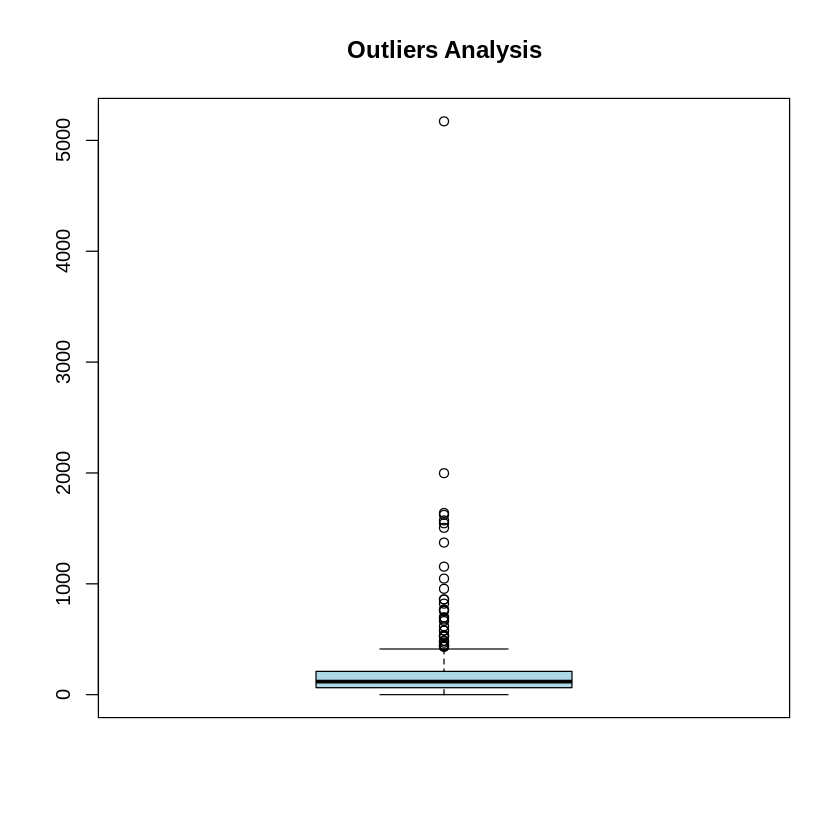

In [ ]:
boxplot(processed_data["like"], main="Outliers Analysis", col="lightblue")

Nhận xét: Nhìn vào biểu đồ này, chúng ta thấy có rất nhiều điểm ngoại lai và cực ngoại lai ở phía trên, chứng tỏ rằng có một số bài đăng trên facebook có sự tương tác rất mạnh

- Tiếp tục vẽ biểu đồ dạng histogram để trực quan các phân bố của dữ liệu

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


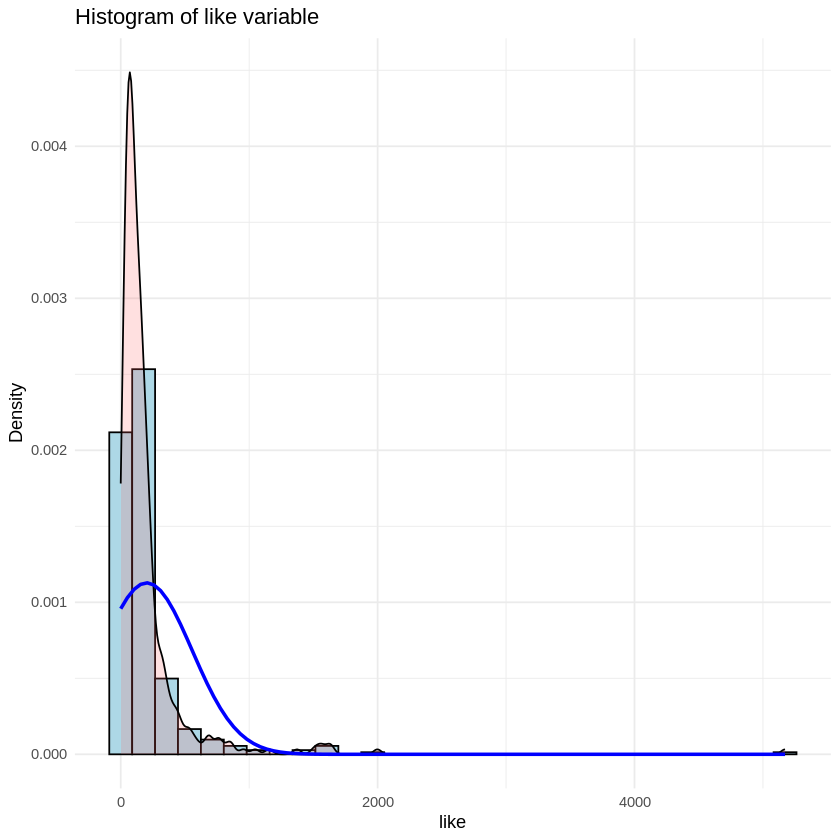

In [ ]:
# Biến like
ggplot(processed_data, aes(x = like)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  stat_function(fun = dnorm, args = list(mean = mean(processed_data$like, na.rm = TRUE), sd = sd(processed_data$like, na.rm = TRUE)),
                color = "blue", size = 1) +
  theme_minimal() +
  labs(title = "Histogram of like variable", x = "like", y = "Density")


Nhận xét: Phân bố có vẻ hơi lệch về phía bên trái so với trung bình.

### Loại bỏ các biến dư thừa và đưa về dạng phù hợp

In [ ]:
processed_data$Paid = factor(processed_data$Paid)
processed_data$Category = factor(processed_data$Category)

levels(processed_data$Paid)
levels(processed_data$Category)

[1] "0" "1"

[1] "1" "2" "3"

- Sau khi factor, chúng ta có các nhóm sau đây:
    - `Paid`: CÓ 2 nhóm là 0 (có chi qc) và 1 (không chi cho qc)
    - `Category`: Có 3 nhóm là 1, 2 và 3
- Tiếp tục xây dựng mô hình ANOVA để xem xét sự phụ thuộc của biến phụ thuộc và biến độc lập

### Visualize dữ liệu

#### Visualize biến Paid

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


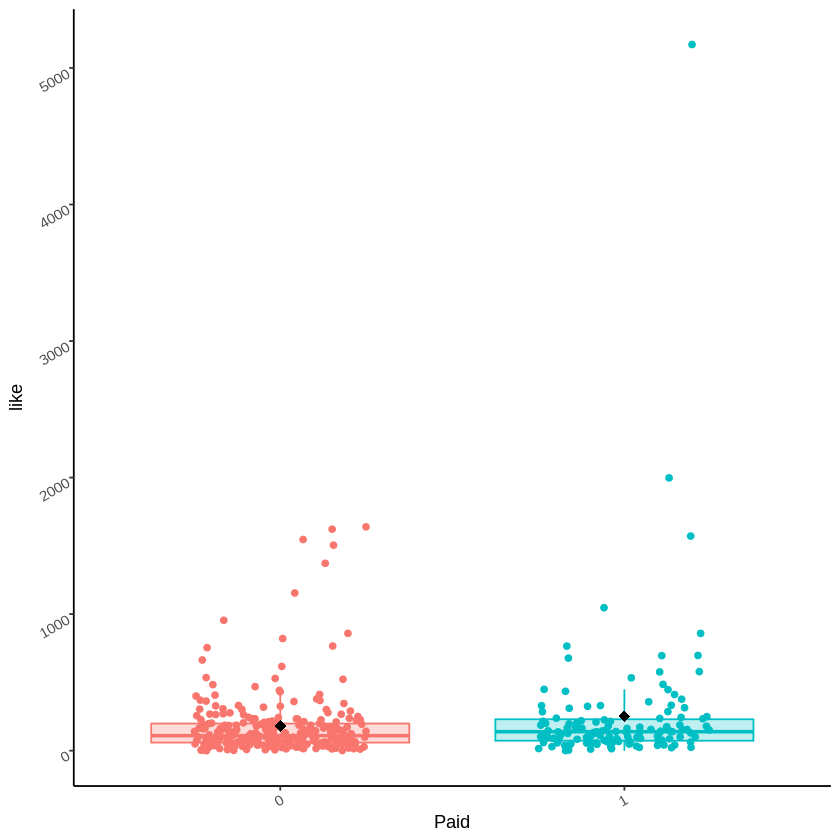

In [ ]:
ggplot(processed_data ,aes(x=Paid, y=like, colour=Paid, fill=Paid))+
  geom_jitter(width=0.25)+
  geom_boxplot(alpha=0.25, outlier.alpha=0) +
  stat_summary(fun.y=mean, colour="black", geom="point",
               shape=18, size=3,show.legend = FALSE) +
  theme_classic() +
  theme(legend.position="none")+
  theme(axis.text = element_text(angle=30, hjust=1, vjust=1))

**Nhận xét:**
- Ở nhóm 0 (Không thuê quảng cáo):
    - Trung vị lớn hơn 0, đa số tập trung trong box; tồn tại ngoại lệ và cực ngoại lệ
- Ở nhóm 1 (Có thuê quảng cáo)
    - Trung vị lớn hơn 0 và lớn hơn nhóm không thuê quảng cáo, chứng tỏ rằng việc chi trả tiền cho quảng cáo sẽ mang lại kết quả tích cực hơn
    - Số lượng ngoại lai và cực ngoại lai ít hơn nhóm 0 nhưng biến động hơn ở phía trên.

**Kết luận**
- Việc chi trả tiền thuê quảng cáo về mặt tổng quan cho hiệu quả tích cực hơn so với không thuê quảng cáo, tuy nhiên không phải lúc nào cũng giúp cho bài post tăng sự tương tác (có nhiều điểm gần điểm 0)

#### Visualize biến Category

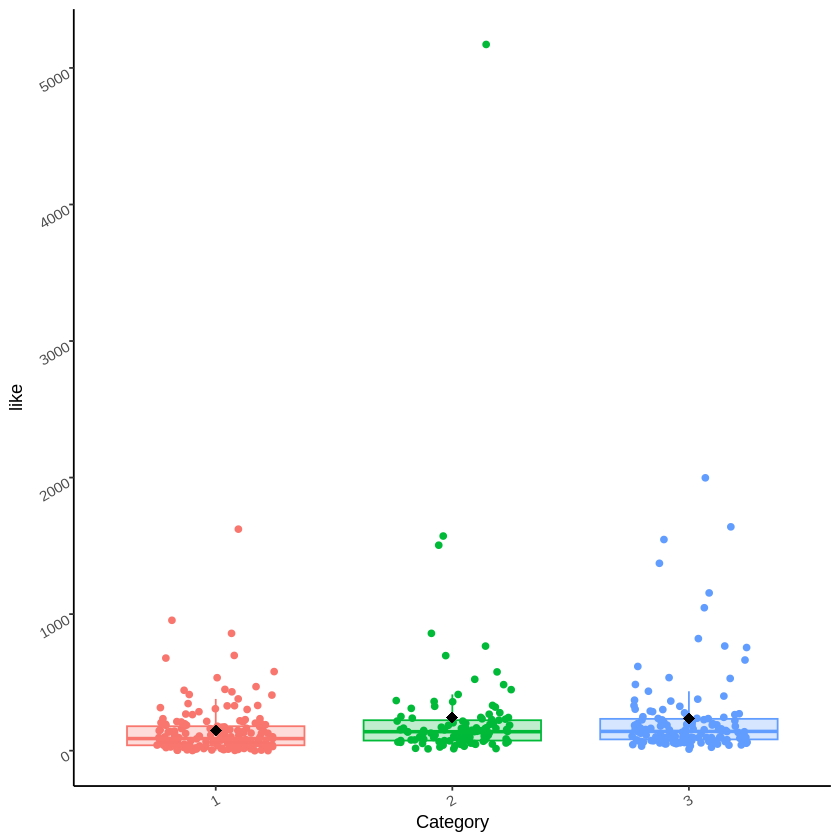

In [ ]:
# Biến Category
ggplot(processed_data ,aes(x=Category, y=like, colour=Category,fill=Category))+
  geom_jitter(width=0.25)+
  geom_boxplot(alpha=0.25, outlier.alpha=0) +
  stat_summary(fun.y=mean, colour="black", geom="point",
               shape=18, size=3,show.legend = FALSE)+
  theme_classic()+
  theme(legend.position="none")+
  theme(axis.text = element_text(angle=30, hjust=1, vjust=1))

**Nhận xét:**
- Về tổng quan ta thấy rằng các nhóm đa số đều nằm trong khoảng box, vẫn tồn tại các điểm ngoại lai, Tuy nhiên ở chủ đề 2 và 3 cho thấy rằng hiệu quả tích cực hơn nhóm 1 (trung vị cao hơn và biến động ngoại lai rộng hơn)

#### Visualize biến phụ thuộc like

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    63.0   118.0   202.3   210.0  5172.0 

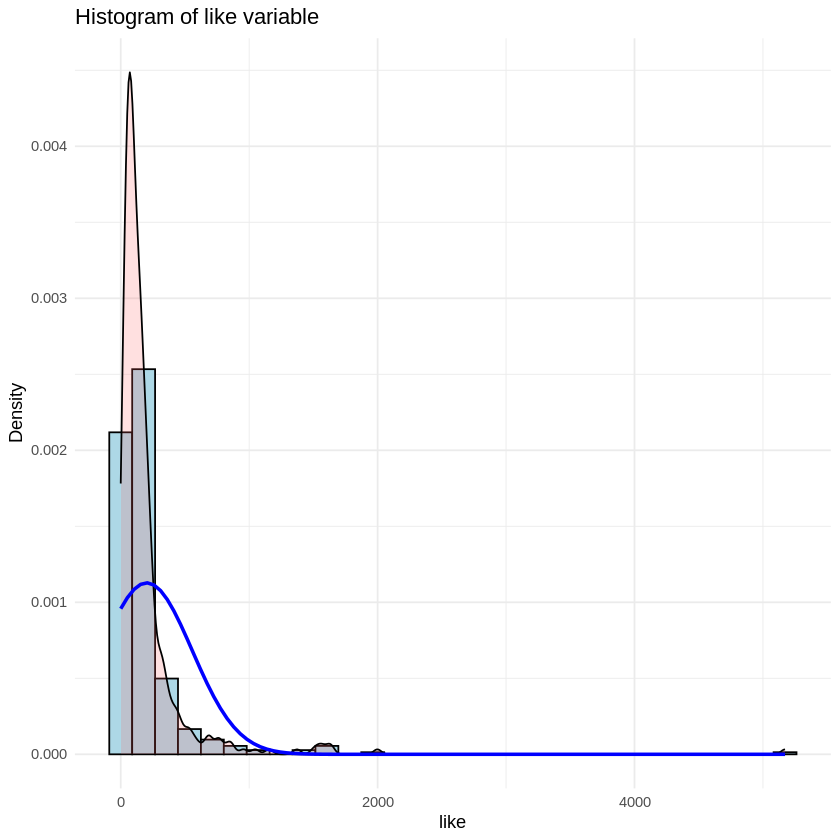

In [ ]:
# Biến phụ thuộc like
ggplot(processed_data, aes(x = like)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  stat_function(fun = dnorm, args = list(mean = mean(processed_data$like, na.rm = TRUE), sd = sd(processed_data$like, na.rm = TRUE)),
                color = "blue", size = 1) +
  theme_minimal() +
  labs(title = "Histogram of like variable", x = "like", y = "Density")
  summary(processed_data$like)

Nhận xét:

1. **Thống Kê Mô Tả**:
   - **Giá trị nhỏ nhất**: 0.0
   - **Phân vị thứ nhất (Q1)**: 63.0
   - **Trung vị (Q2)**: 118.0
   - **Giá trị trung bình**: 202.3
   - **Phân vị thứ ba (Q3)**: 210.0
   - **Giá trị lớn nhất**: 5172.0

2. **Hình Dạng Phân Bố**:
   - Phân bố có độ lệch phải lớn (lệch dương). Điều này thể hiện qua đuôi dài mở rộng về phía các giá trị lớn hơn.
   - Phần lớn các điểm dữ liệu tập trung ở phía đầu dưới, với đỉnh nhọn gần giá trị nhỏ nhất.

3. **Xu Hướng Trung Tâm**:
   - Trung vị (118.0) thấp hơn đáng kể so với giá trị trung bình (202.3), đây là một dấu hiệu khác của sự lệch.
   - Các giá trị phân vị thứ nhất và thứ ba cũng cho thấy phần lớn dữ liệu tập trung ở khoảng giá trị thấp.

4. **Giá Trị Ngoại Lệ**:
   - Có một số giá trị ngoại lệ lớn kéo dài đến 5172.0, xa so với phần lớn dữ liệu. Những ngoại lệ này làm ảnh hưởng đến giá trị trung bình, làm cho nó cao hơn so với trung vị.

5. **Biểu Đồ Mật Độ**:
   - Đường màu xanh biểu thị ước lượng mật độ của biến "like".
   - Biểu đồ mật độ cũng xác nhận sự lệch, với đỉnh cao ở các giá trị thấp và giảm dần về phía các giá trị cao.



## Kiểm định các giả thuyết thống kê (ANOVA assumptions)
Gồm các bước sau:
- Các mẫu độc lập (Thỏa mãn bước tiền xử lý)
- Biến phụ thuộc là biến liên tục (Thỏa mãn)
- Các nhóm có phân phối chuẩn hoặc gần chuẩn ==> Sai số có phân phối chuẩn

### Xây dựng và kiểm định mô hình tương tác (Interaction model)

In [ ]:
# Xây dựng mô hình tương tác
int_model = aov(like~Category * Paid, data = processed_data)
summary(int_model)

               Df   Sum Sq Mean Sq F value Pr(>F)  
Category        1   584670  584670   4.741 0.0300 *
Paid            1   487829  487829   3.956 0.0474 *
Category:Paid   1      971     971   0.008 0.9293  
Residuals     401 49452484  123323                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhận xét:
- Với mức ý nghĩa 5%, ta thấy rằng giữa `Category` và `Paid` có mối quan hệ tương tác với nhau dẫn đến tác động hiệu quả của bài đăng trên facebook
- Tiếp tục đi kiểm định các thông số sau:
    - Shapiro-Wilk test
    - leveneTest
    - durbinWatsonTest


	Shapiro-Wilk normality test

data:  av_residual
W = 0.94585, p-value = 1.579e-11


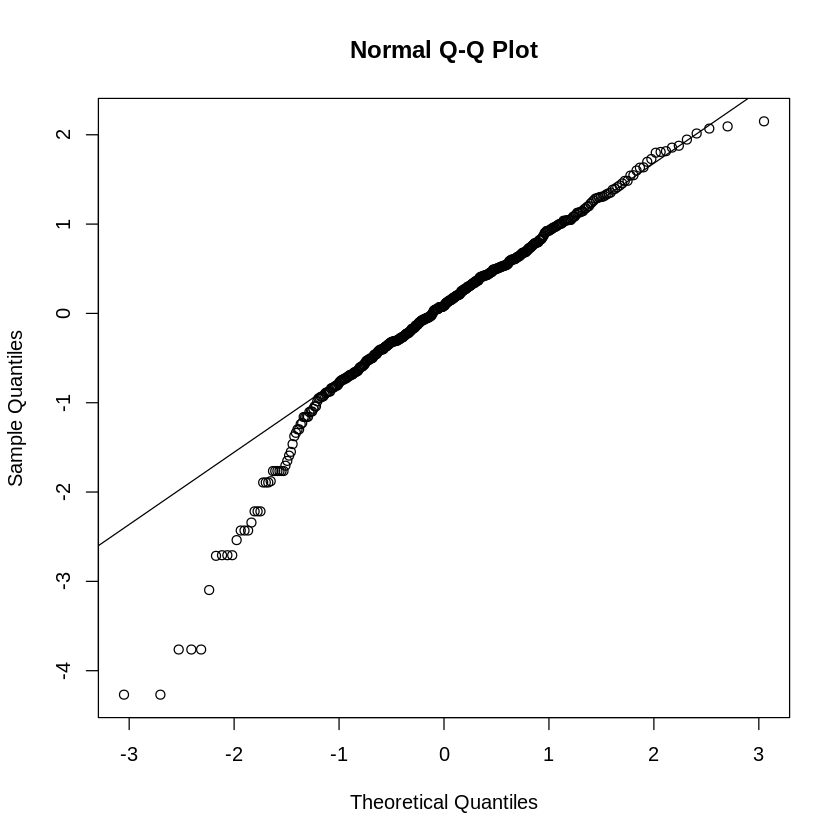

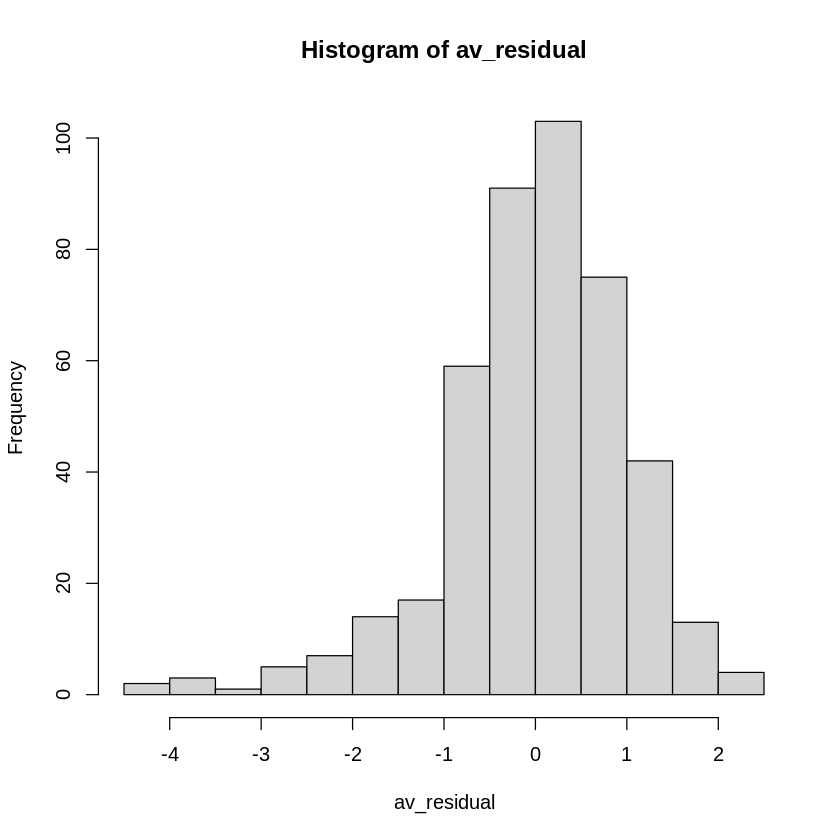

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(int_model)
shapiro.test(av_residual)
# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 2.2e-16 chúng ta đủ cơ sở bác bỏ H0, vậy sai số có phân phối không chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, nhiều điểm bị kéo lệch ra khỏi đường thẳng --> Khả năng các điểm nhiễu chính là các điểm ngoại lệ (outliners).

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(int_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,3.431213,0.004772486
,399,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 0.004 < 0.05, ta đủ điều kiện bác bỏ H0, vậy các nhóm có phương sai không đồng nhất.

 lag Autocorrelation D-W Statistic p-value
   1     -0.04151594      2.082431   0.318
 Alternative hypothesis: rho != 0

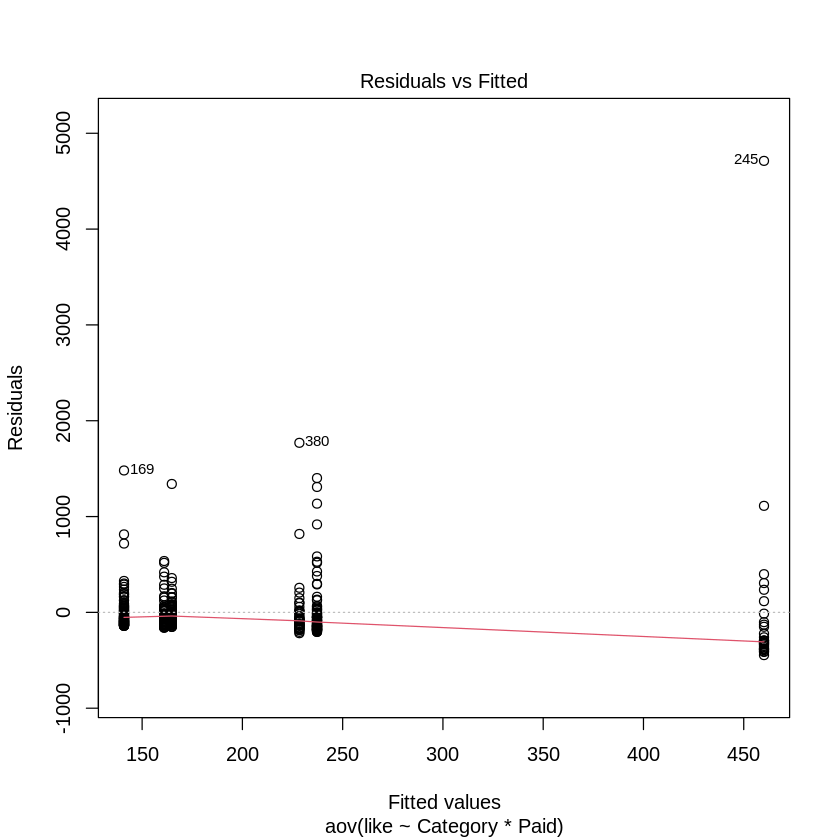

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(int_model)
plot(int_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.274 (> 0.05) nên không có sự tương quan.

KẾT LUẬN:
- Với bước kiểm định levene ta thấy rằng mô hình chúng ta không đảm bảo tính chuẩn, tuy nhiên với mức giá trị p=0.047 ta thấy rằng xấp xỉ chuẩn với độ tự tin 0.05. Vì thế, ta vẫn có thể tiếp tục đi phân tích ANOVA

### Phân tích phương sai k nhân tố
Gồm các bước sau
- Kiểm tra sự tương tác
- Phân tích ảnh hưởng đơn
    - Phân tích ảnh hưởng đơn của quảng cáo ở mỗi loại thể loại
    - Phân tích ảnh hưởng đơn của thể loại trong việc sử dụng quảng cáo
- Phân tích ảnh hưởng chính
    - Phân tích ảnh hưởng chính của Quảng cáo với hiệu quả của bàai post
    - Phân tích ảnh hưởng chính của Thể loại với hiệu quả của bài post

#### Kiểm tra sự tương tác

               Df   Sum Sq Mean Sq F value  Pr(>F)   
Category        2   800440  400220   3.337 0.03653 * 
Paid            1   529500  529500   4.415 0.03625 * 
Category:Paid   2  1343595  671797   5.602 0.00399 **
Residuals     399 47852419  119931                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

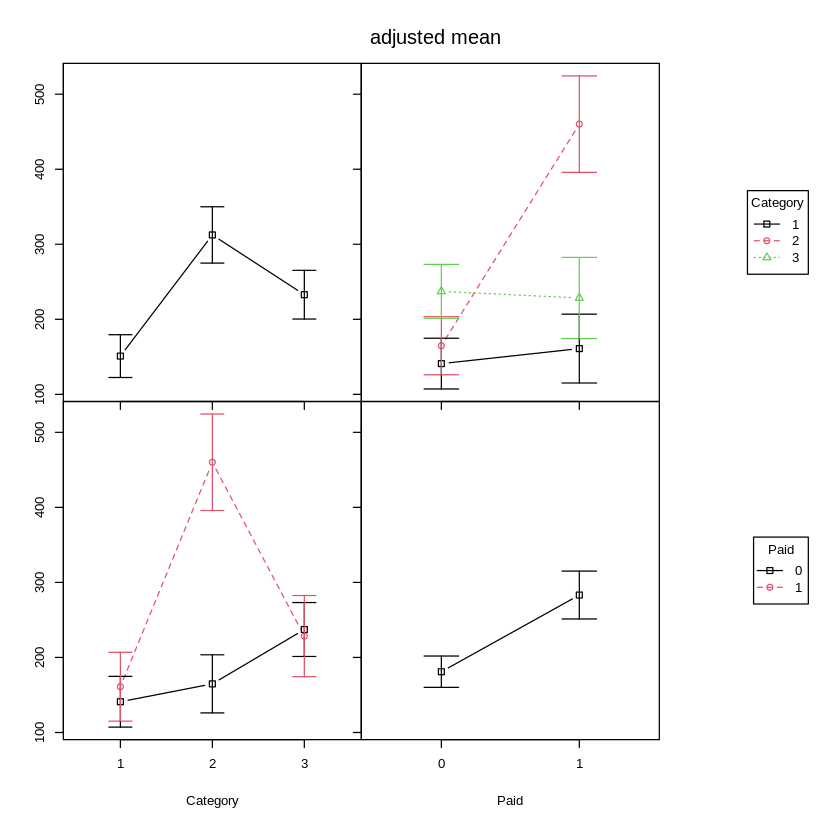

In [ ]:
int_model = aov(like~Category * Paid, data = processed_data)
summary(int_model)
plot(interactionMeans(int_model))


- Kết quả ANOVA cho thấy các yếu tố "Category" và "Paid" đều có ảnh hưởng đáng kể đến biến phụ thuộc (p-value < 0.05).
- Tương tác giữa "Category" và "Paid" cũng có ảnh hưởng đáng kể (p-value < 0.01).

Biểu Đồ Bên Trái
--

Biểu đồ bên trái gồm hai phần nhỏ:
1. **Biểu Đồ Trên Trái**:
   - Thể hiện mối quan hệ giữa "Category" và giá trị trung bình điều chỉnh.
   - "Category 2" có giá trị trung bình cao nhất, trong khi "Category 1" và "Category 3" có giá trị trung bình thấp hơn.

2. **Biểu Đồ Dưới Trái**:
   - Thể hiện mối quan hệ giữa "Category" và "Paid".
   - "Category 2" có giá trị trung bình cao nhất khi "Paid" = 0, và giảm khi "Paid" = 1.
   - Khi Paid = 0, ta thấy rằng có sự tăng trưởng khi Category đi từ 1 đến 3. Ngược lại "Paid" = 1 thì kết quả lúc tăng lúc giảm
   - Về tổng quan thì Paid = 1 sẽ cho kết quả tốt hơn, đặc biệt là category 2.

## Biểu Đồ Bên Phải

Biểu đồ bên phải gồm hai phần nhỏ:
1. **Biểu Đồ Trên Phải**:
   - Thể hiện mối quan hệ giữa "Paid" và giá trị trung bình điều chỉnh cho các nhóm "Category".
   - Nhóm category2 cho thấy hiệu quả vượt bậc khi Paid = 1, trong khi 2 nhóm còn lại thì không có sự thay đổi không đáng kể (tăng giảm rất ít).

2. **Biểu Đồ Dưới Phải**:
   - Thể hiện mối quan hệ giữa "Paid" và giá trị trung bình điều chỉnh.
   - Giá trị trung bình tăng khi "Paid" chuyển từ 0 sang 1.

### Kết Luận
- Cả "Category" và "Paid" đều ảnh hưởng đáng kể đến giá trị trung bình điều chỉnh của biến phụ thuộc.
- Tương tác giữa "Category" và "Paid" cho thấy sự thay đổi trong giá trị trung bình giữa các nhóm "Category" phụ thuộc vào trạng thái "Paid".


#### Phân tích ảnh hưởng đơn

##### Phân tích ảnh hưởng đơn của quảng cáo ở mỗi loại thể loại

In [ ]:
testInteractions(int_model, fixed = "Paid", across = "Category")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 8, is not a multiple of vector length 6 of arg 2”


,Category1,Category2,SE1,SE2,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-96.24240,-72.4043,49.31306,5.280829e+01,2,482827.1,2.012939,0.134949872
1,-67.43218,231.6888,70.91681,8.402792e+01,2,1750797.0,7.299192,0.001540442
Residuals,NA,NA,399.00000,4.785242e+07,NA,NA,NA,NA


Giả định:
- H0: Thuê quảng cáo Không ảnh hưởng đến hiệu quả tương tác bài post
- H1: Thuê quảng cáo Có ảnh hưởng đến hiệu quả của tương tác bài post

Nhận xét: Với kết quả phân tích ta có một số nhận xét như sau, với độ tin cậy 5% thì:
- Thuê quảng cáo có ảnh hưởng đến kết quả của loại tương tác bài post ở các thể loại

##### Phân tích ảnh hưởng đơn của thể loại ở việc thuê quảng cáo

In [ ]:
testInteractions(int_model, fixed = "Category", across = "Paid")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-20.020551,56.97587,1,14808.164,0.12347249,1.000000000
2,-295.303448,75.06453,1,1856087.831,15.47631351,0.000295576
3,8.789667,64.92090,1,2198.401,0.01833056,1.000000000
Residuals,NA,399.00000,47852419,NA,NA,NA


Giả định:
- H0: Thể loại không có sự tương tác trong việc thuê quảng cáo
- H1: Thể loại có sự tương tác trong việc thuê quảng cáo

Nhận xét: Với kết quả phân tích ta có một số nhận xét như sau, với độ tin cậy 5% thì:
- Chỉ có thể loại thứ 2 thể hiện rõ sự tương tác với `Paid`, các trường hợp còn lại là không thể hiện sự tương tác.

##### Phân tích ảnh hưởng đơn giữa các nhóm thể loại ứng với việc thuê quảng cáo hay không thuê quảng cáo

In [ ]:
options(contrasts = c(unordered="contr.sum", ordered="contr.poly"))
one_vs_two = list(Category = c(1, -1, 0))
one_vs_three = list(Category = c(1, 0, -1))
two_vs_three = list(Category = c(0, 1, -1))

In [ ]:
testInteractions(int_model, custom = c(one_vs_two), fixed = "Paid", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0 : Category1,-23.8381,51.39392,1,25801.84,0.2151393,1.0000000000
1 : Category1,-299.1210,78.99113,1,1719761.36,14.3396048,0.0003521958
Residuals,NA,399.00000,47852419,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau giữa nhóm 1 và nhóm 2
- H1: Có sự khác nhau giữa nhóm 1 và nhóm 2

Nhận xét: Với độ tin cậy 5%
- Có sự tương tác có ý nghĩa thống kê ở việc thuê quảng cáo giữa nhóm 1 và nhóm 2

In [ ]:
testInteractions(int_model, custom = c(one_vs_three), fixed = "Paid", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0 : Category1,-96.24240,49.31306,1,456814.5,3.8089819,0.1033554
1 : Category1,-67.43218,70.91681,1,108434.4,0.9041407,0.6844990
Residuals,NA,399.00000,47852419,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau giữa nhóm 1 và nhóm 3
- H1: Có sự khác nhau giữa nhóm 1 và nhóm 3

Nhận xét: Với độ tin cậy 5%
- Có sự tương tác có ý nghĩa thống kê ở việc thuê quảng cáo giữa nhóm 1 và nhóm 3
- Có sự tương tác có ý nghĩa thống kê ở việc không thuê quảng cáo giữa nhóm 1 và nhóm 3

In [ ]:
testInteractions(int_model, custom = c(two_vs_three), fixed = "Paid", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0 : Category1,-72.4043,52.80829,1,225452.8,1.879856,0.3422424
1 : Category1,231.6888,84.02792,1,911788.2,7.602614,0.0121922
Residuals,NA,399.00000,47852419,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau giữa nhóm 2 và nhóm 3
- H1: Có sự khác nhau giữa nhóm 2 và nhóm 3

Nhận xét: Với độ tin cậy 5%
- Có sự tương tác có ý nghĩa thống kê ở việc thuê quảng cáo giữa nhóm 2 và nhóm 3
- Có sự tương tác có ý nghĩa thống kê ở việc không thuê quảng cáo giữa nhóm 2 và nhóm 3

**Nhận xét chung**
- Việc thuê quảng cáo chỉ cho kết quả tốt hơn ở nhóm 1 và 2. Các nhóm còn lại việc chi tiền cho quảng cáo và không chi tiền đều cho kết quả như nhau --> Khả năng cao mức ảnh hưởng này sẽ giải thích bới một yếu tố khác mà ta chưa khảo sát (như content chẳng hạn)

##### Phân tích ảnh hưởng đơn giữa quảng cáo ứng với các nhóm thể loại (category)

In [ ]:
options(contrasts = c(unordered="contr.sum", ordered="contr.poly"))
no_vs_yes = list(Paid = c(1, -1))

In [ ]:
testInteractions(int_model, custom = c(no_vs_yes), fixed = "Category", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1 : Paid1,-20.020551,56.97587,1,14808.164,0.12347249,1.000000000
2 : Paid1,-295.303448,75.06453,1,1856087.831,15.47631351,0.000295576
3 : Paid1,8.789667,64.92090,1,2198.401,0.01833056,1.000000000
Residuals,NA,399.00000,47852419,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau trong tương tác hiệu quả giữa việc thuê quảng cáo và không thuê quảng cáo
- H1: Có sự khác nhau trong tương tác hiệu quả giữa việc thuê quảng cáo và không thuê quảng cáo

Nhận xét: Với độ tin cậy 5%
- Ở thể loại 1 và 3, chỉ ra không có sự khác nhau hiệu quả giữa việc thuê và không thuê quảng cáo, trong khi đó thể loại 2 cho thấy sự khác nhau này về mặt thống kê

#### Phân tích ảnh hưởng chính

##### Phân tích ảnh hưởng chính của Quảng cáo với hiệu quả của bài post thông qua số lượt like
Gồm các bước sau:
- Xây dựng mô hình
- Kiểm định các giả thiết của mô hình
- Kiểm định trung bình của các nhóm
- Nhận xét

In [ ]:
paid_model = aov(like~Paid, data = processed_data)
summary(paid_model)

             Df   Sum Sq Mean Sq F value Pr(>F)  
Paid          1   439911  439911    3.54 0.0606 .
Residuals   403 50086044  124283                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhận xét: Với mức ý nghĩa 0.05, ta thấy rằng Paid không có ý nghĩa trong việc giải thích mô hình, tuy nhiên chúng ta vẫn đi kiểm định các giả thiết phía sau (vì với mức ý nghĩa 0.06 cũng khá là gần với 0.05)


	Shapiro-Wilk normality test

data:  av_residual
W = 0.42545, p-value < 2.2e-16


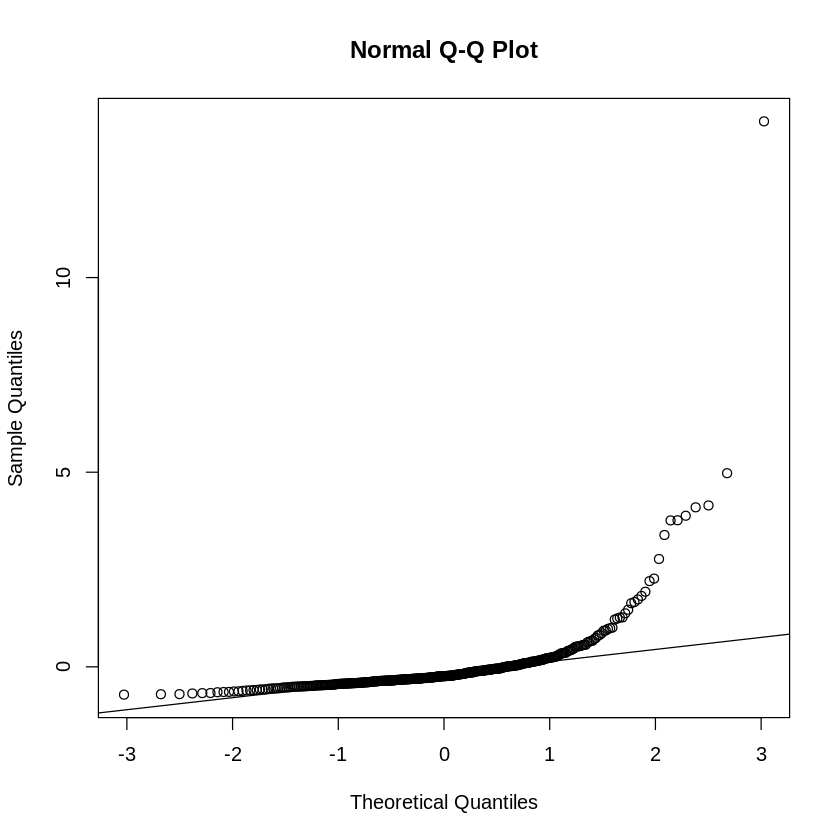

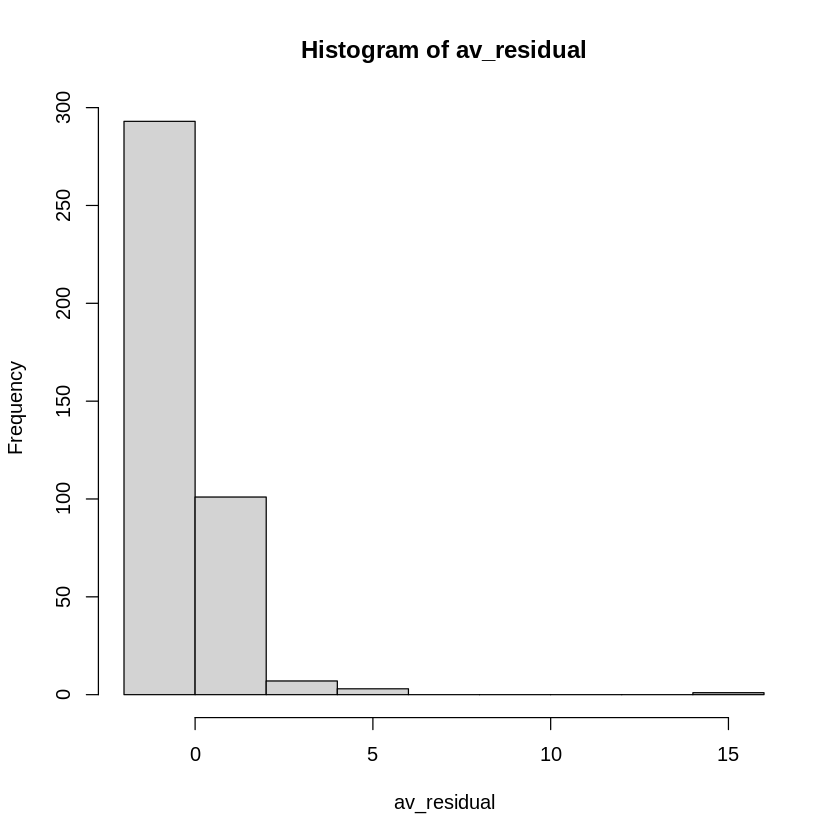

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(paid_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 2.2e-16 chúng ta đủ cơ sở bác bỏ H0, vậy sai số có phân phối không chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, có nhiều điểm bị kéo lệch ra khỏi đường thẳng đặc biệt là đuôi phía trên --> Khả năng các điểm nhiễu chính là các điểm ngoại lệ (outliners), biểu đồ lệch chuẩn

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(paid_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.460602,0.1175189
,403,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 0.1175189 > 0.05, ta không đủ điều kiện bác bỏ H0, vậy các nhóm có phương sai đồng đồng nhất.

 lag Autocorrelation D-W Statistic p-value
   1     -0.04042821      2.080494   0.292
 Alternative hypothesis: rho != 0

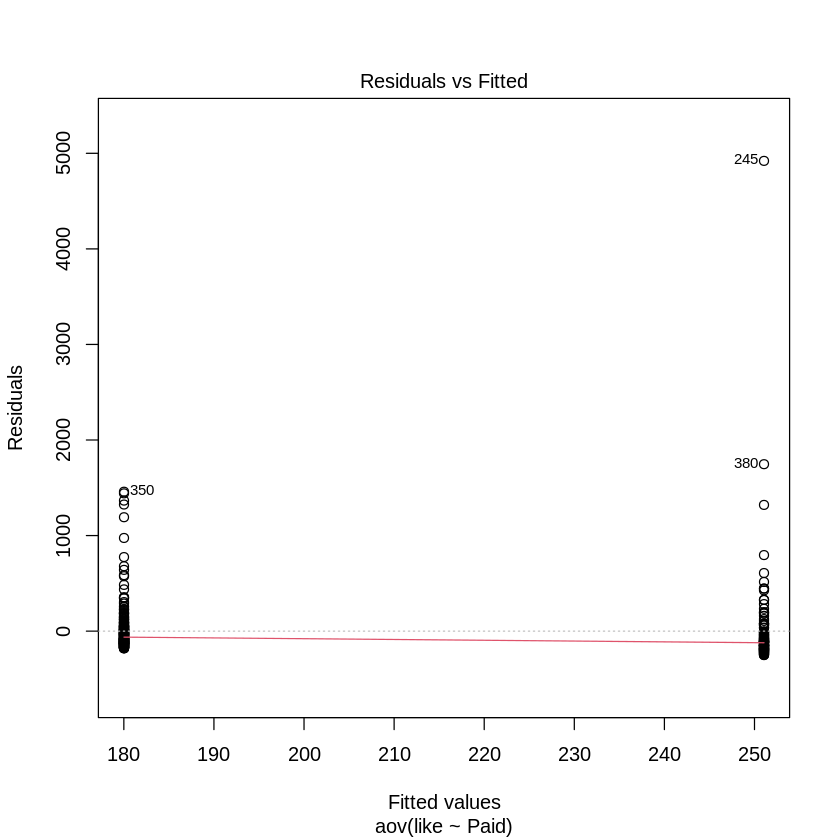

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(paid_model)
plot(paid_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.292 nên không có sự tương quan.

Kiểm định trung bình giữa các nhóm liều lượng


	Pairwise comparisons using t tests with pooled SD 

data:  like and Paid 

  0    
1 0.061

P value adjustment method: bonferroni 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = like ~ Paid, data = processed_data)

$Paid
        diff       lwr      upr    p adj
1-0 71.03713 -3.190128 145.2644 0.060641


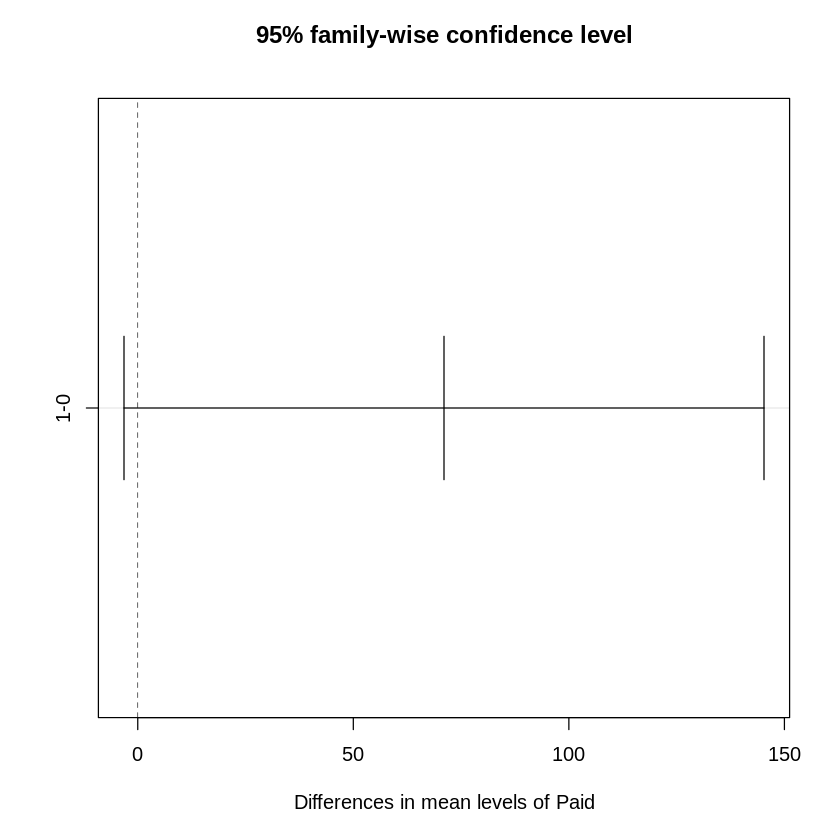

In [ ]:
with(processed_data, pairwise.t.test(like, Paid, p.adj = "bonferroni"))
TukeyHSD(aov(like~Paid, data=processed_data), conf.level = 0.95)
plot(TukeyHSD(aov(like~Paid, data=processed_data), conf.level = 0.95))

Giả định:
- Giả thuyết:
    + H0: Các giá trị trung bình giữa các cặp bằng nhau
    + H1: Các giá trị trung bình giữa các cặp không bằng nhau
- Nhìn vào kết quả ta có: p-value=0.060641 có giá trị lớn hơn 0.05 (độ tin cậy 95%) nên ta không có cơ sở để bác bỏ H0. Vậy rõ ràng giữa các nhóm này có giá trị trung bình là như nhau. Nghĩa là các nhóm có quảng cáo hay không quảng cáo thì độ hiệu quả là như nhau thông qua số lượng lượt like.
- Nhìn vào kết quả và hình vẽ ta cũng thấy ngay giữa nhóm có mức độ hiệu quả trung bình như nhau (đồ thị cắt điểm 0)

Vì chỉ có 2 nhóm nên ta sẽ không tiến hành phân tích tương tác nhóm. Như vậy, ta có kết luận như sau: Việc chi tiền cho quảng cáo hay không cũng chỉ cho cùng một kết quả như nhau (do trung bình như nhau).

##### Phân tích ảnh hưởng chính của Categor với hiệu quả của bài post thông qua lượt like
Gồm các bước sau:
- Xây dựng mô hình
- Kiểm định các giả thiết của mô hình
- Kiểm định trung bình của các nhóm
- Nhận xét

In [ ]:
category_model = aov(like~Category, data = processed_data)
summary(category_model)

             Df   Sum Sq Mean Sq F value Pr(>F)  
Category      2   800440  400220   3.236 0.0404 *
Residuals   402 49725514  123695                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhận xét: Với mức ý nghĩa 0.05, ta thấy rằng Category có ý nghĩa trong việc giải thích mô hình


	Shapiro-Wilk normality test

data:  av_residual
W = 0.42048, p-value < 2.2e-16


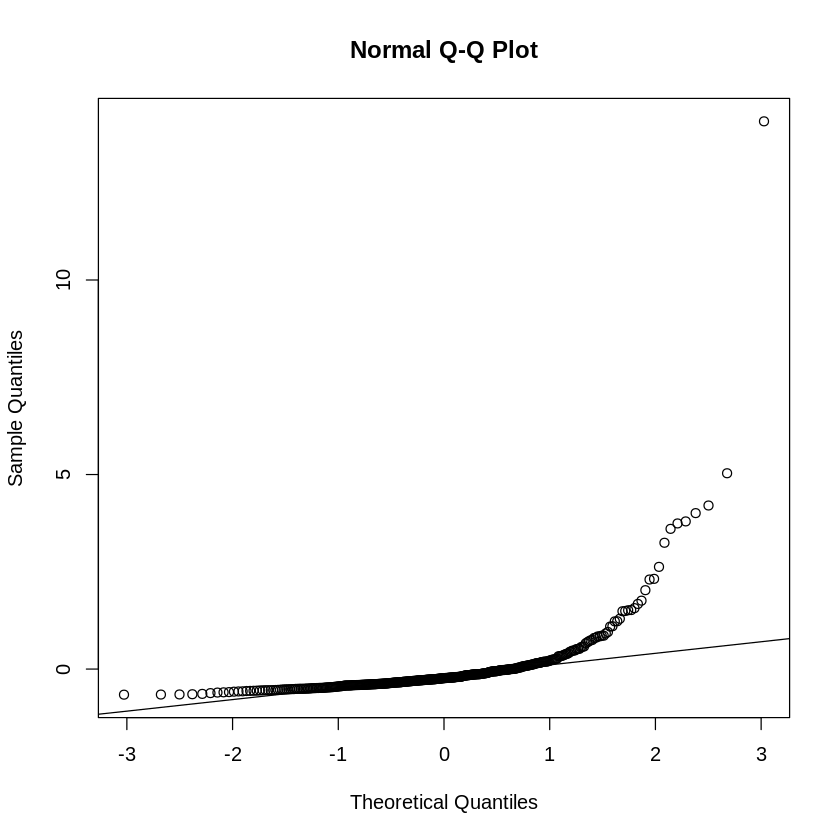

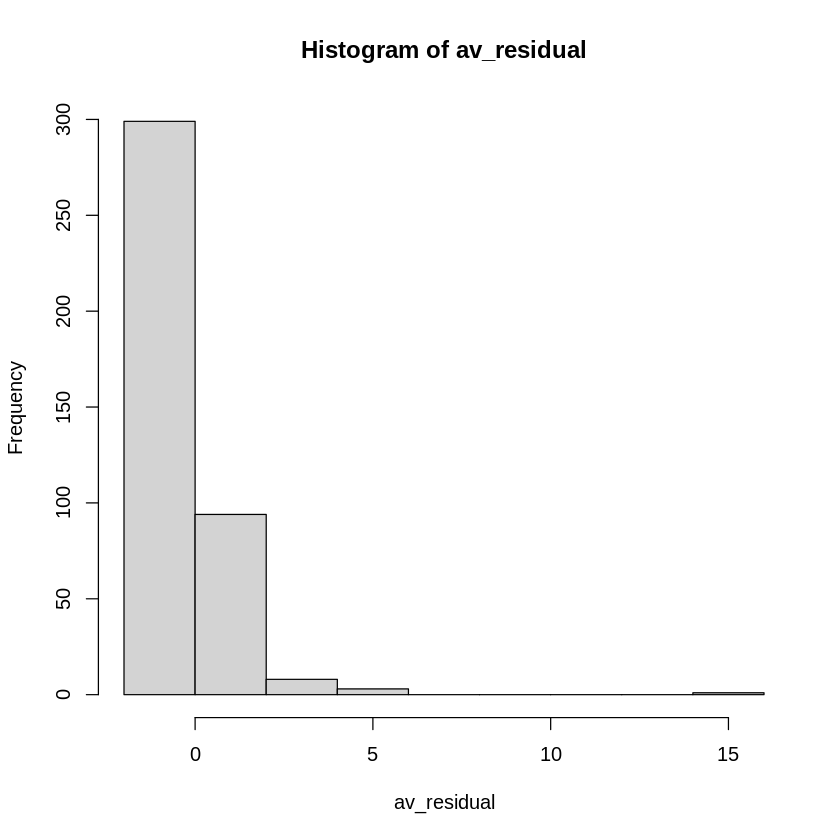

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(category_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 2.2e-16 chúng ta đủ cơ sở bác bỏ H0, vậy sai số có phân phối không chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, có nhiều điểm bị kéo lệch ra khỏi đường thẳng đặc biệt là đuôi phía trên --> Khả năng các điểm nhiễu chính là các điểm ngoại lệ (outliners), biểu đồ lệch chuẩn

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(category_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.191298,0.3048969
,402,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 0.3048969 > 0.05, ta không đủ điều kiện bác bỏ H0, vậy các nhóm có phương sai đồng nhất.

 lag Autocorrelation D-W Statistic p-value
   1    -0.003960227      2.006963   0.862
 Alternative hypothesis: rho != 0

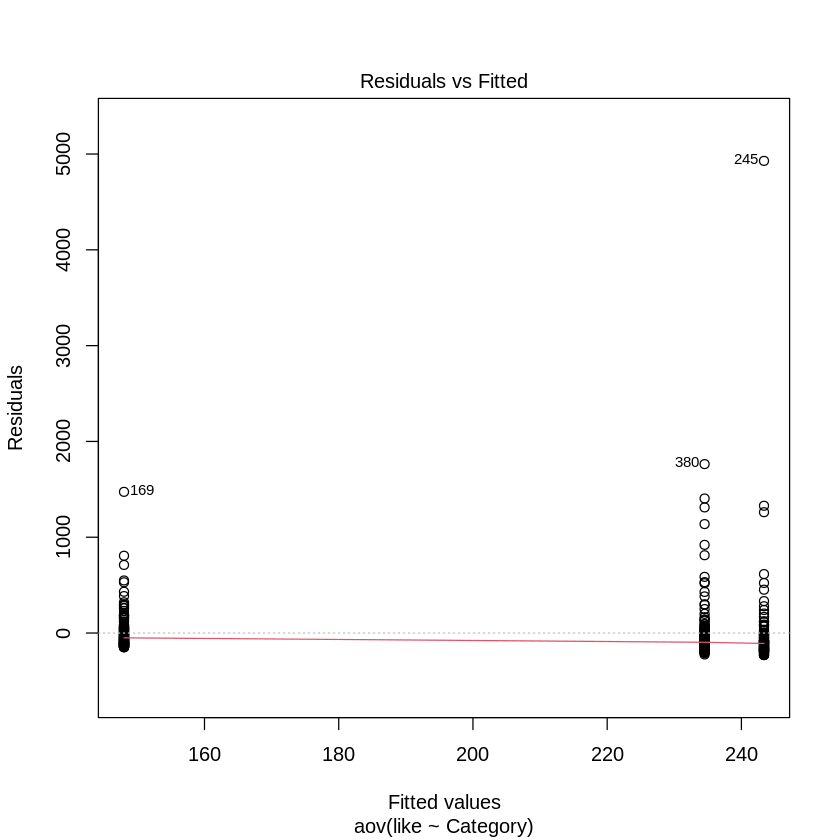

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(category_model)
plot(category_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.87 nên không có sự tương quan.

Kiểm định độ hiệu quả trung bình giữa các nhóm category


	Pairwise comparisons using t tests with pooled SD 

data:  like and Category 

  1     2    
2 0.088 -    
3 0.107 1.000

P value adjustment method: bonferroni 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = like ~ Category, data = processed_data)

$Category
         diff        lwr       upr     p adj
2-1 95.360800   -7.13513 197.85673 0.0743314
3-1 86.508753  -10.10271 183.12022 0.0897905
3-2 -8.852047 -115.56821  97.86412 0.9792288


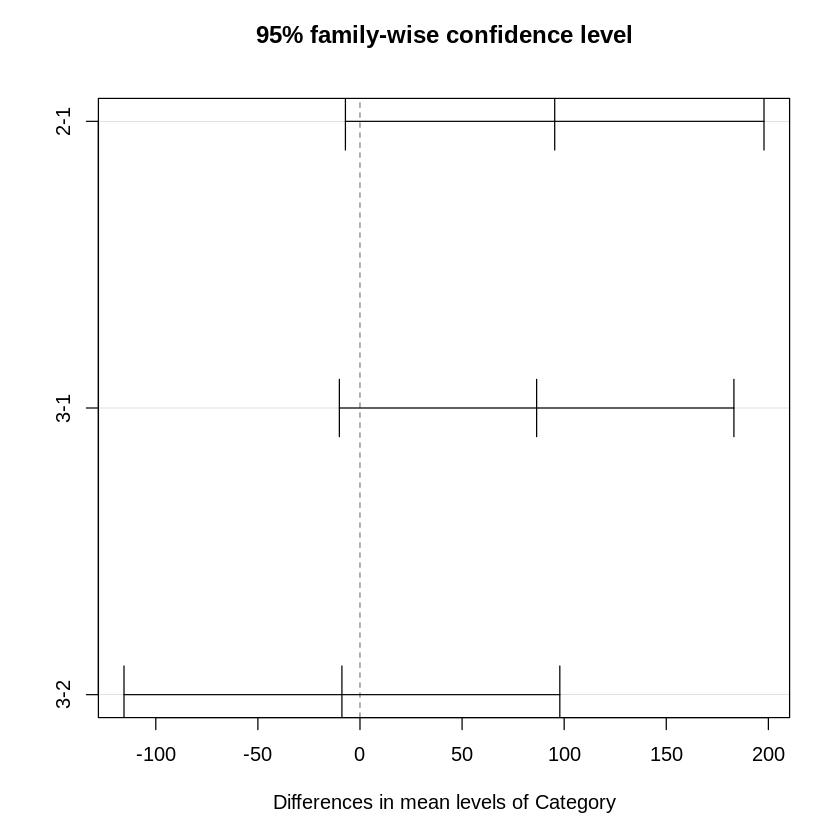

In [ ]:
with(processed_data, pairwise.t.test(like, Category, p.adj = "bonferroni"))
TukeyHSD(aov(like~Category, data=processed_data), conf.level = 0.95)
plot(TukeyHSD(aov(like~Category, data=processed_data), conf.level = 0.95))

Giả định:
- Giả thuyết:
    + H0: Các giá trị trung bình giữa các cặp bằng nhau
    + H1: Các giá trị trung bình giữa các cặp không bằng nhau
- Nhìn vào kết quả ta có: Tất cả các nhóm đều có p-value > 0.05 nên các mức độ trung bình giữa các cặp là như nhau.
- Nhìn vào kết quả và hình vẽ ta cũng thấy ngay giữa các cặp có mức độ hiệu quả trung bình như nhau (đồ thị cắt điểm 0)

### Xây dựng và kiểm định mô hình cộng (Additive model)
Gồm các bước sau:
- Xây dựng mô hình với các biến
- Kiểm định mô hình

In [ ]:
add_model = aov(like~Category + Paid, processed_data)
summary(add_model)

             Df   Sum Sq Mean Sq F value  Pr(>F)   
Category      1   838265  838265   8.206 0.00435 **
Paid          1   673770  673770   6.596 0.01051 * 
Residuals   495 50564590  102151                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhận xét: Với p-value=5%, các biến đều có ý nghĩa trong giải thích mô hình. Ta tiến hành kiểm định  Shapiro và Breusch-Pagan


	Shapiro-Wilk normality test

data:  av_residual
W = 0.43469, p-value < 2.2e-16


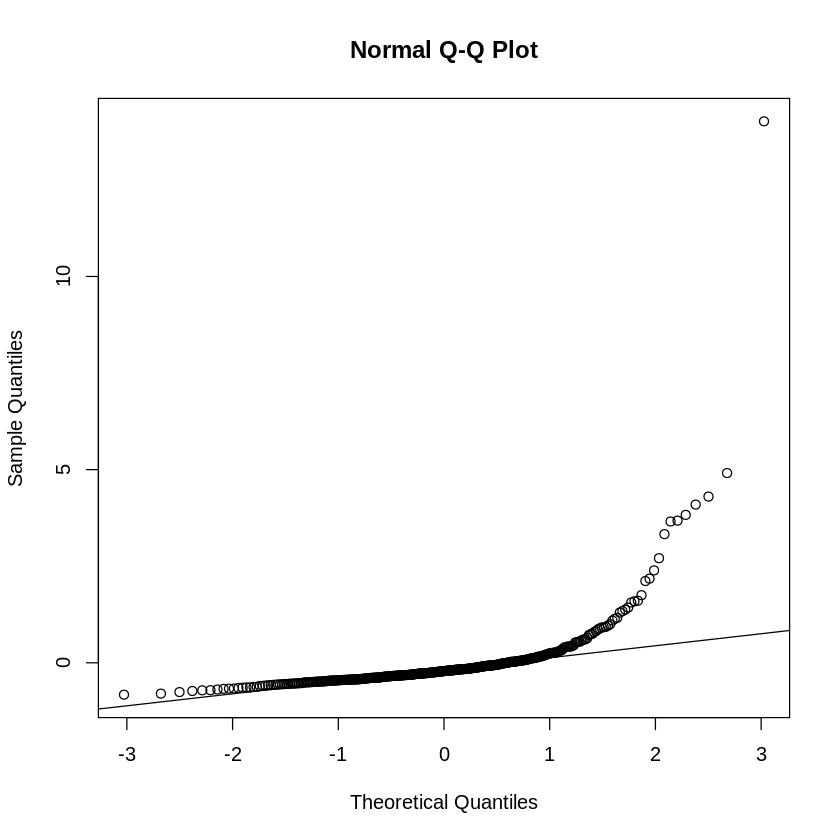

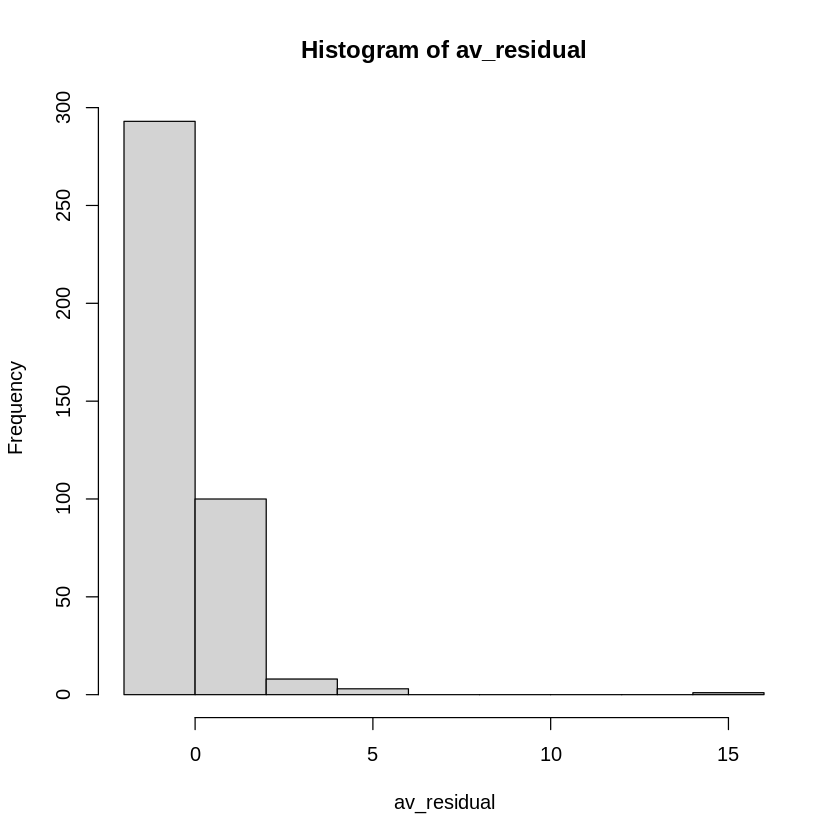

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(add_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 2.2e-16 chúng ta đủ cơ sở bác bỏ H0, vậy sai số có phân phối không chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, có nhiều điểm bị kéo lệch ra khỏi đường thẳng đặc biệt là đuôi phía trên --> Khả năng các điểm nhiễu chính là các điểm ngoại lệ (outliners), biểu đồ lệch chuẩn

 lag Autocorrelation D-W Statistic p-value
   1     -0.03610975       2.07151   0.428
 Alternative hypothesis: rho != 0

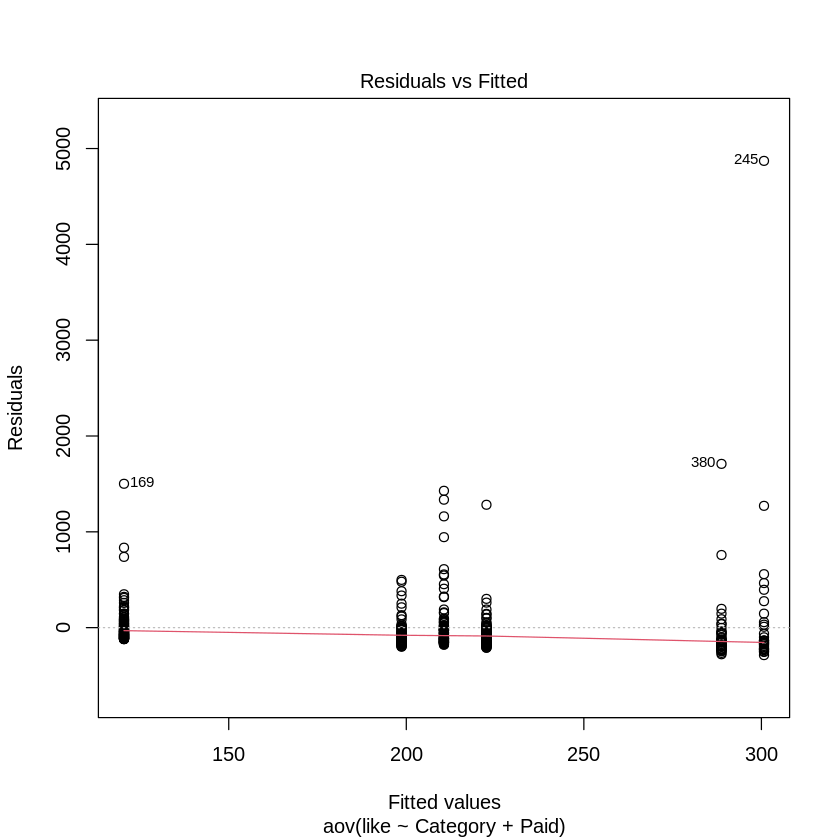

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(add_model)
plot(add_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.412 nên không có sự tương quan.

In [ ]:
# Kiểm định  Breusch-Pagan
bptest(add_model)


	studentized Breusch-Pagan test

data:  add_model
BP = 5.3467, df = 3, p-value = 0.1481


Giả định:
 - H0: phương sai không đổi
 - H1: phương sai thay đổi

 Với p-value=0.148 > 0.05 thì ta không đủ điều kiện bác bỏ H0. Vậy phương sai của mô hình không thay đổi.

## Kết luận
- Giữa "Paid" và "Category" có sự tương tác với nhau tác động đến hiệu quả của bài post thông qua số lượt like. Đặc biệt là nhóm  category2 nếu dùng quảng cao sẽc cho kết quả tích cực. Trong trường hợp ngược lại thì không nên thuê quảng cáo vì không có sự khác biệt giữa trước và sau thuê.

## Cải tiến mô hình

Như chúng ta đã biết, trong quá trình xử lý dữ liệu, ta thấy có một các điểm cực ngoại lai, khả năng cao sẽ ảnh hưởng đến chất lượng mô hình. Vì vậy chúng ta sẽ tiến hành loại bỏ các điểm này

In [ ]:
# Khảo sát ngoại lai theo biến diff
like_data = processed_data["like"]
outliers_index = list()
extreme_outliers_index = list()

for (i in 1:ncol(like_data)) {
  # Tính toán Q1, Q3 và IQR
  Q1 = quantile(like_data[, i], 0.25, na.rm = TRUE)
  Q3 = quantile(like_data[, i], 0.75, na.rm = TRUE)
  IQR = Q3 - Q1

  # Xác định ngoại lai
  outliers_index_i = like_data[, i] < (Q1 - 1.5 * IQR) | like_data[, i] > (Q3 + 1.5 * IQR)
  # outliers_i = like_data[like_data[, i] < (Q1 - 1.5 * IQR) | like_data[, i] > (Q3 + 1.5 * IQR), i]

  # Lưu trữ ngoại lai
  field_name = names(like_data)[i]
  outliers_index[[field_name]] = which(outliers_index_i)

  # Xác định cực ngoại lai
  extreme_outliers_index_i = like_data[, i] < (Q1 - 3 * IQR) | like_data[, i] > (Q3 + 3 * IQR)
  extreme_outliers_index[[field_name]] = which(extreme_outliers_index_i)
}
# In kết quả theo từng biến ra màn hình
for (i in 1:ncol(like_data)) {
  print(paste("Biến:", names(like_data)[i]))
  print(paste("Số ngoại lai:", length(outliers_index[[names(like_data)[i]]])))
  print(paste("Số cực ngoại lai:", length(extreme_outliers_index[[names(like_data)[i]]])))
}

# Tìm tổng số quan trắc ngoại lai và cực ngoại lai thực sự
outliers = c()
extreme_outliners = c()
for (i in 1:ncol(like_data)){
    outliers = c(outliers, outliers_index[[names(like_data)[i]]])
    extreme_outliners = c(extreme_outliners, extreme_outliers_index[[names(like_data)[i]]])
}

outliers = unique(outliers)
extreme_outliners = unique(extreme_outliners)
print(paste("Tổng số ngoại lai:", length(outliers)))
print(paste("Tổng số cực ngoại lai:", length(extreme_outliners)))

[1] "Biến: like"
[1] "Số ngoại lai: 40"
[1] "Số cực ngoại lai: 22"
[1] "Tổng số ngoại lai: 40"
[1] "Tổng số cực ngoại lai: 22"


In [ ]:
# Loại bỏ các điểm ngoại lai và cực ngoại lai
rm_outliner_data = processed_data[-extreme_outliners,]
rm_outliner_data = rm_outliner_data[-outliers,]

# Kiểm tra lại số lượng dữ liệu
dim(rm_outliner_data)
str(rm_outliner_data)
# # Chuyển like về dạng log
# rm_outliner_data$like = log10(rm_outliner_data$like + 1)

[1] 438   3

'data.frame':	438 obs. of  3 variables:
 $ Category: Factor w/ 3 levels "1","2","3": 2 2 3 2 3 3 2 3 2 2 ...
 $ Paid    : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 1 1 1 ...
 $ like    : int  79 130 66 152 249 325 161 113 233 88 ...


Sau khi loại bỏ ngoại lai và cực ngoại lai, ta còn lại 438 samples

### Visualize lại dữ liệu

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_density()`).”


 Category   Paid          like       
 1:215    0   :360   Min.   :   0.0  
 2:130    1   :139   1st Qu.:  56.5  
 3:155    NA's:  1   Median : 101.0  
                     Mean   : 177.9  
                     3rd Qu.: 187.5  
                     Max.   :5172.0  
                     NA's   :1       

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_density()`).”


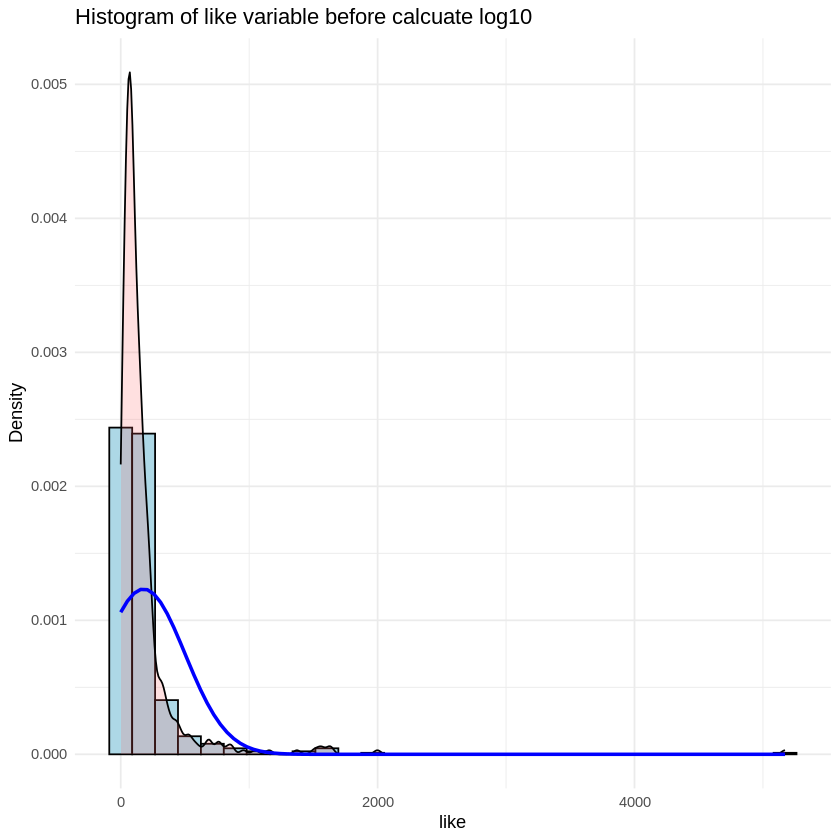

 Category   Paid          like      
 1:196    0   :318   Min.   :  0.0  
 2:109    1   :119   1st Qu.: 55.0  
 3:133    NA's:  1   Median : 97.0  
                     Mean   :126.6  
                     3rd Qu.:166.0  
                     Max.   :579.0  
                     NA's   :1      

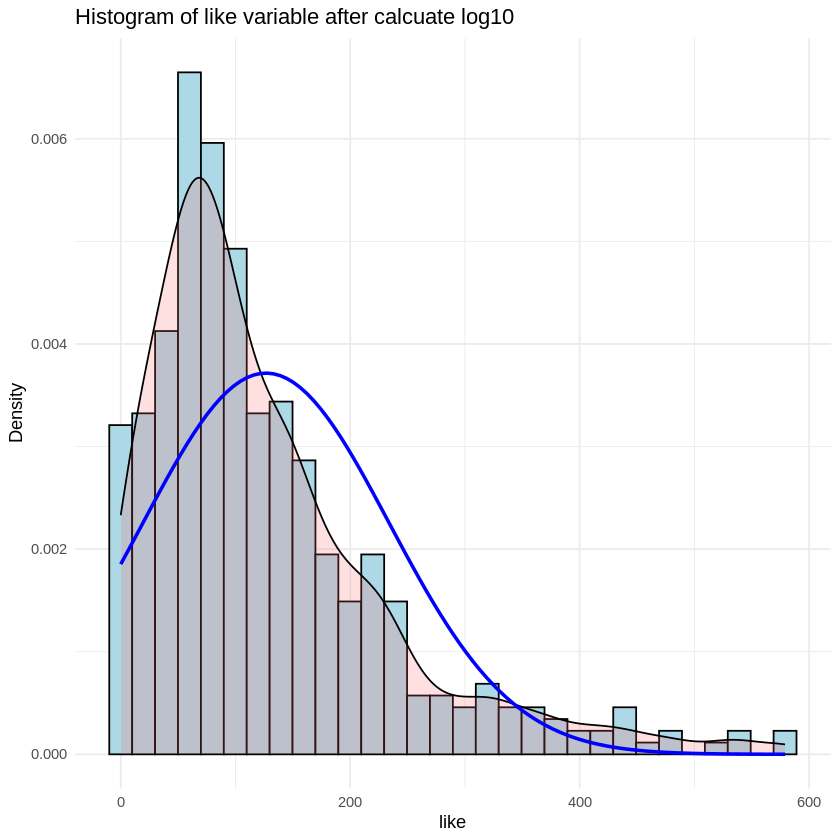

In [ ]:
# Biến phụ thuộc like
ggplot(processed_data, aes(x = like)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  stat_function(fun = dnorm, args = list(mean = mean(processed_data$like, na.rm = TRUE), sd = sd(processed_data$like, na.rm = TRUE)),
                color = "blue", size = 1) +
  theme_minimal() +
  labs(title = "Histogram of like variable before calcuate log10", x = "like", y = "Density")
  summary(processed_data)

  # Biến phụ thuộc like
ggplot(rm_outliner_data, aes(x = like)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  stat_function(fun = dnorm, args = list(mean = mean(rm_outliner_data$like, na.rm = TRUE), sd = sd(rm_outliner_data$like, na.rm = TRUE)),
                color = "blue", size = 1) +
  theme_minimal() +
  labs(title = "Histogram of like variable after calcuate log10", x = "like", y = "Density")
  summary(rm_outliner_data)

Nhận xét: Sau khi loại bỏ các điểm ngoại lai và cực ngoại lai, ta thu được đồ thị gần chuẩn và có hình dáng tốt hơn trước khi loại.

#### Kiểm định mô hình

               Df  Sum Sq Mean Sq F value   Pr(>F)    
Category        2  200989  100494   9.143 0.000129 ***
Paid            1   85534   85534   7.782 0.005512 ** 
Category:Paid   2   11079    5539   0.504 0.604487    
Residuals     430 4726373   10992                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness


	Shapiro-Wilk normality test

data:  av_residual
W = 0.84158, p-value < 2.2e-16


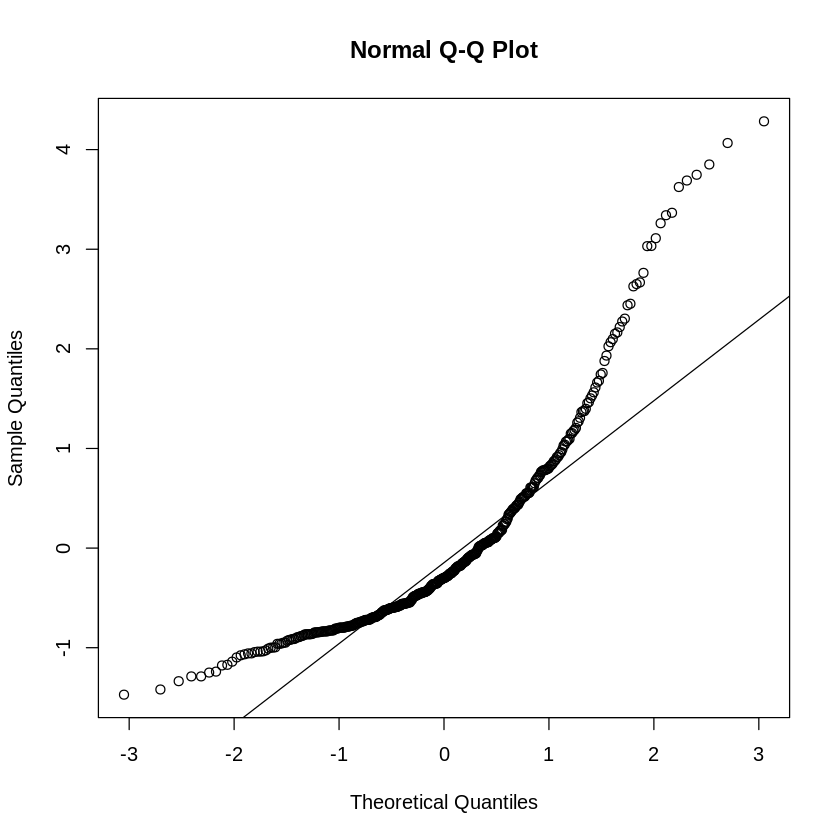

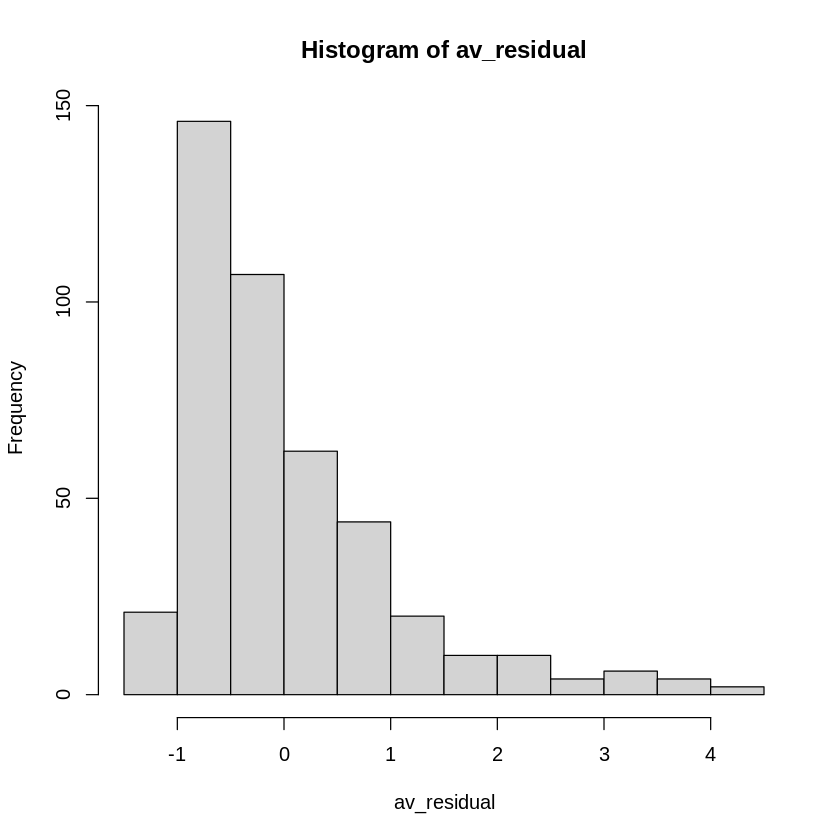

In [ ]:
# Shapiro-Wilk test
int_model = aov(like ~ Category * Paid, rm_outliner_data)
summary(int_model)

av_residual = rstandard(int_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

- Với mức ý nghĩa 5%, ta thấy Category vaf Paid có mối liên hệ mật thiết (có tương tác)  tới like.
- Với mức ý nghĩa 5%, ta thấy rằng phần dư không tuân theo chuẩn nhưng về tổng quan sẽ cho kết quả tốt hơn trước khi chưa xử lý dữ liệu.

 lag Autocorrelation D-W Statistic p-value
   1      0.01959622      1.960124   0.678
 Alternative hypothesis: rho != 0

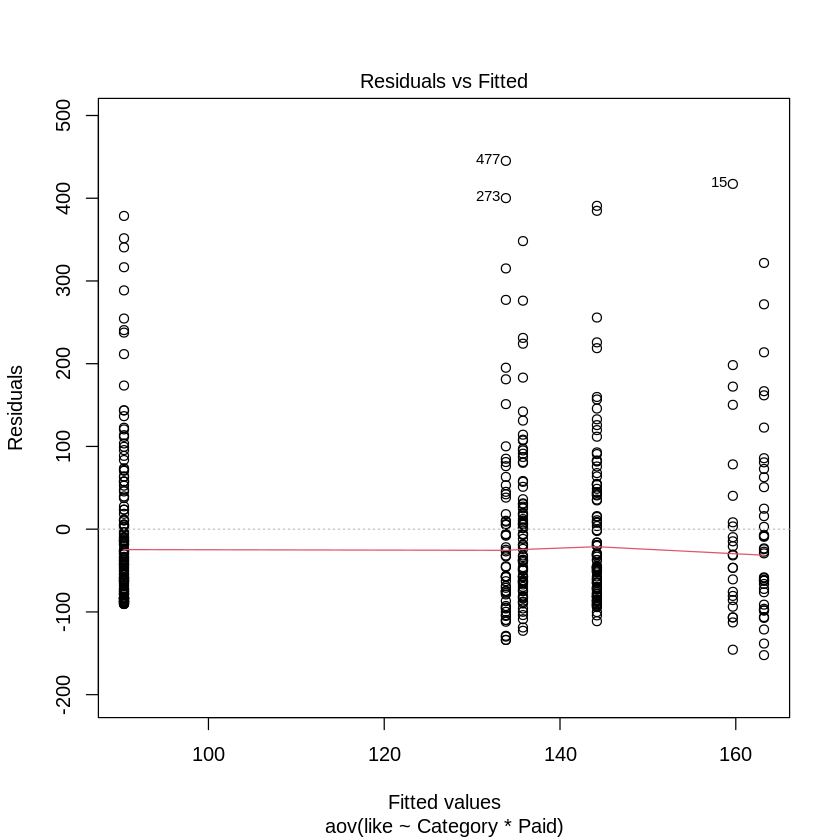

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(int_model)
plot(int_model, 1)

Với mức ý nghĩa 5%, ta thấy rằng mô hình không có sự tương quan (độc lập)

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(int_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,0.7839293,0.561649
,430,NA,NA


Với mức ý nghĩa 5%, ta thấy mô hình có phương sai của các nhóm đồng nhất (tệ hơn trước)

#### Kiểm định anova mô hình

Trong phần này, chúng tôi chỉ phân tích các điểm khác nhau giữa trước và sau khi loại outliers, trường hợp kết quả giống nhau, có thể xem lại kết quả trước đó.

               Df  Sum Sq Mean Sq F value   Pr(>F)    
Category        2  200989  100494   9.143 0.000129 ***
Paid            1   85534   85534   7.782 0.005512 ** 
Category:Paid   2   11079    5539   0.504 0.604487    
Residuals     430 4726373   10992                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

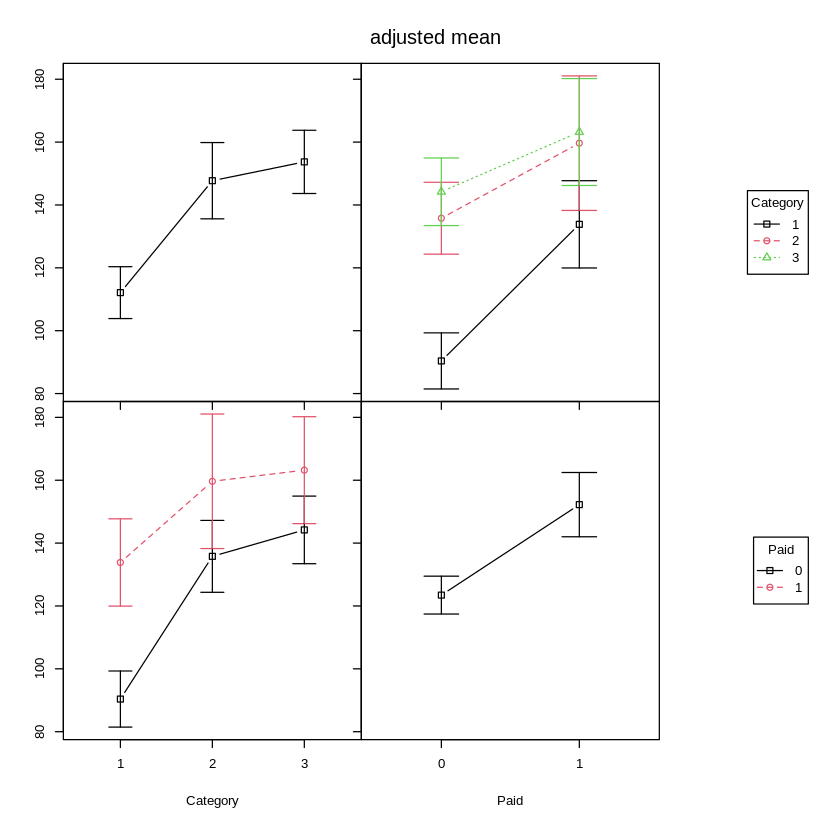

In [ ]:
summary(int_model)
plot(interactionMeans(int_model))

Nhận xét:
- Với mức ý nghĩa 5% ta thấy giữa Category và Paid không có sự tương tác, nhưng bản thân chúng sẽ có sự ảnh hưởng độc lập đến `like`. Vì vậy ta chỉ sẽ đi phân tích ảnh hưởng chính của 2 thành phần này mà không đi phân tích ảnh hưởng đơn.

**NHẬN XÉT**

- Biểu đồ bên trái cho thấy hiệu quả tăng dần khi thay đổi từ 1- 2 -3 (ảnh hưởng của 3 là rõ rệt nhất tronh nhóm Category)
- Biểu đồ bên phải cho thấy rằng việc sử dụng quảng cáo (Paid) sẽ cho kết quả tốt hơn khi không sử dụng quảng cáo.

#### Phân tích ảnh hưởng chính

##### Phân tích ảnh hưởng chính của Category với hiệu quả tương tác bài post thông qua lượt like
Gồm các bước sau:
- Xây dựng mô hình
- Kiểm định các giả thiết của mô hình
- Kiểm định trung bình của các nhóm
- Nhận xét

In [ ]:
category_model = lm(like~Category, data = rm_outliner_data)
summary(category_model)


Call:
lm(formula = like ~ Category, data = rm_outliner_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-138.63  -73.09  -31.09   39.91  475.91 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  103.092      7.551  13.653  < 2e-16 ***
Category2     37.541     12.610   2.977 0.003074 ** 
Category3     46.539     11.858   3.925 0.000101 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 105.4 on 434 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03975,	Adjusted R-squared:  0.03533 
F-statistic: 8.984 on 2 and 434 DF,  p-value: 0.0001503


Nhận xét: Với mức ý nghĩa 0.05, ta thấy rằng các nhóm category đều ảnh hưởng đến số lượt like


	Shapiro-Wilk normality test

data:  av_residual
W = 0.83235, p-value < 2.2e-16


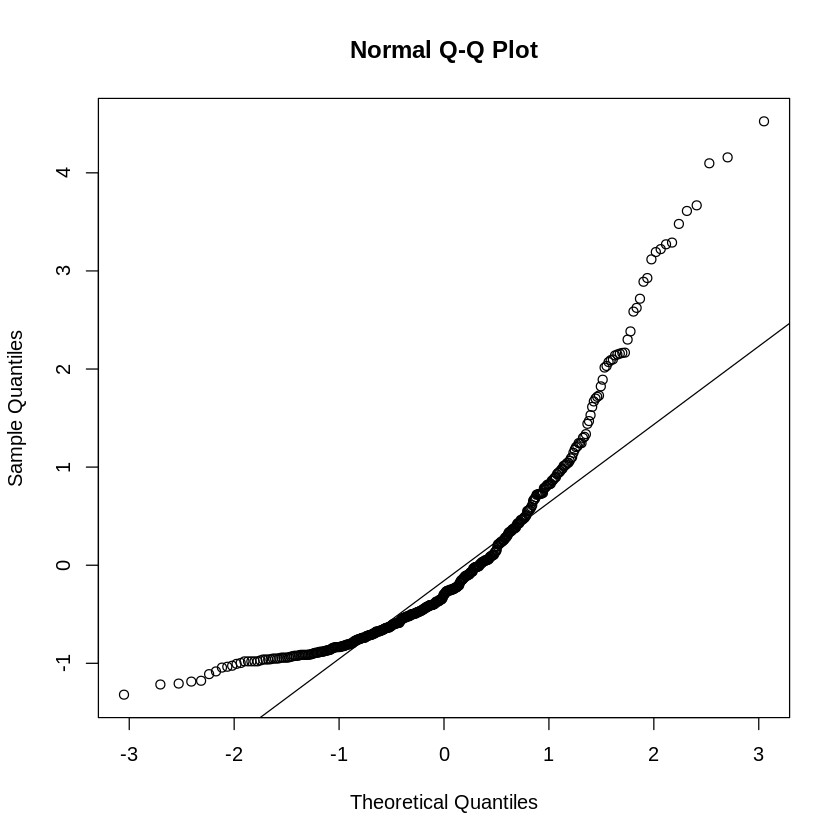

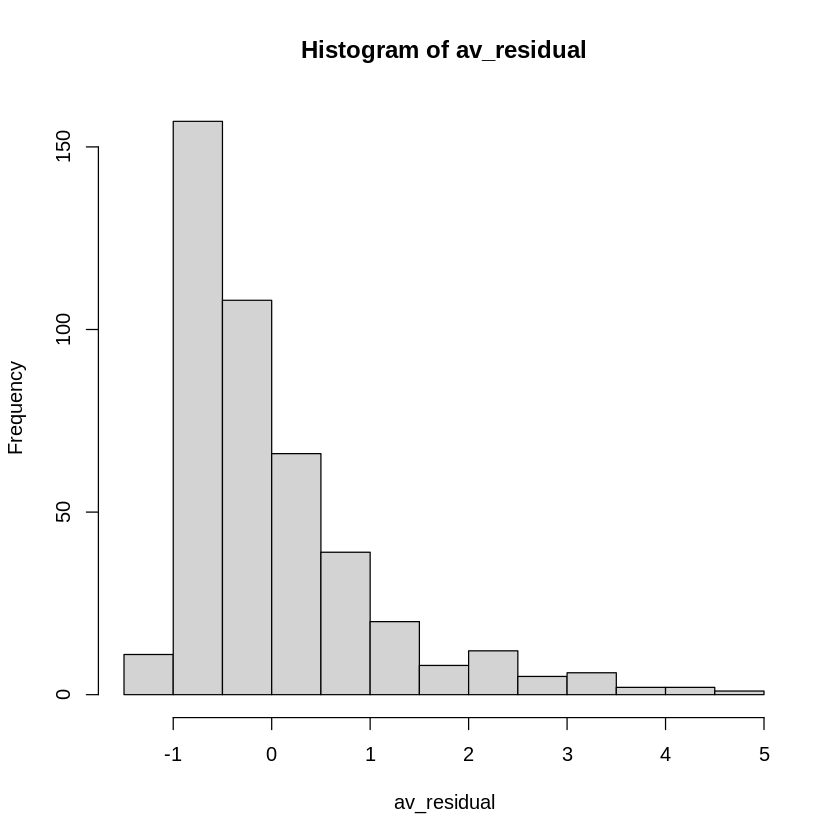

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(category_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Nhẫn xét: Giá trị p-value đã tăng lên rất nhiều (mặc dù < 0.05), hình dáng đồ thị gần chuẩn hơn so với trước khi chưa xử lý dữ liệu

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(category_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.1707522,0.843087
,434,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 0.843087 > 0.05, ta không điều kiện bác bỏ H0, vậy các nhóm có phương sai đồng nhất (giá trị p-value tăng lên).

 lag Autocorrelation D-W Statistic p-value
   1       0.0667957      1.865111   0.178
 Alternative hypothesis: rho != 0

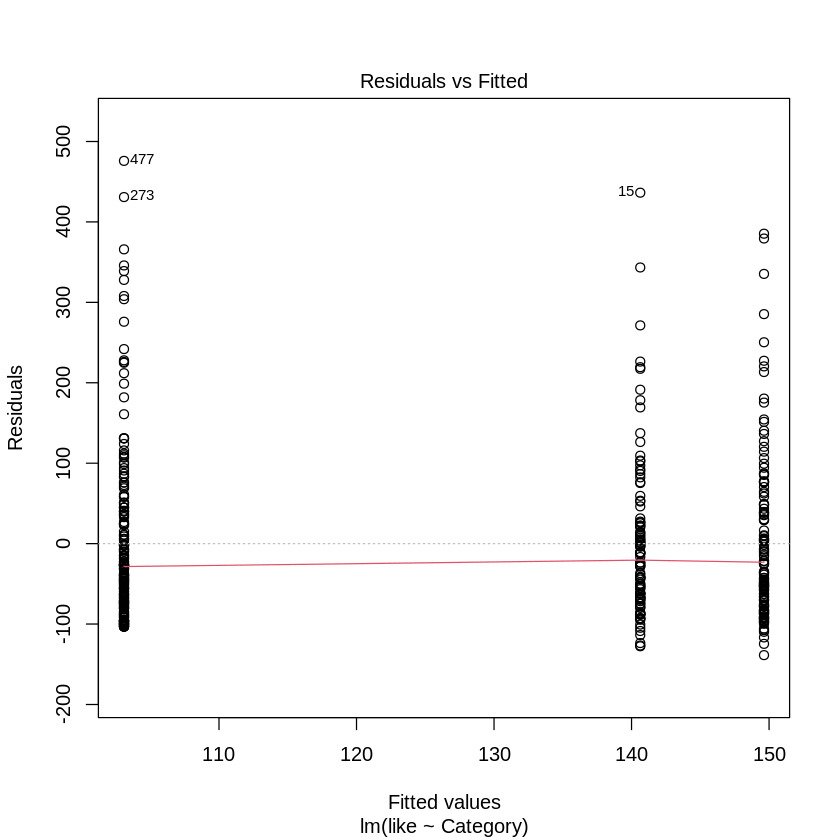

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(category_model)
plot(category_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.178 nên không có sự tương quan.


	Pairwise comparisons using t tests with pooled SD 

data:  like and Category 

  1      2     
2 0.0092 -     
3 0.0003 1.0000

P value adjustment method: bonferroni 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = like ~ Category, data = rm_outliner_data)

$Category
         diff        lwr      upr     p adj
2-1 37.540720   7.883648 67.19779 0.0086193
3-1 46.539271  18.651370 74.42717 0.0002970
3-2  8.998551 -23.041311 41.03841 0.7864899


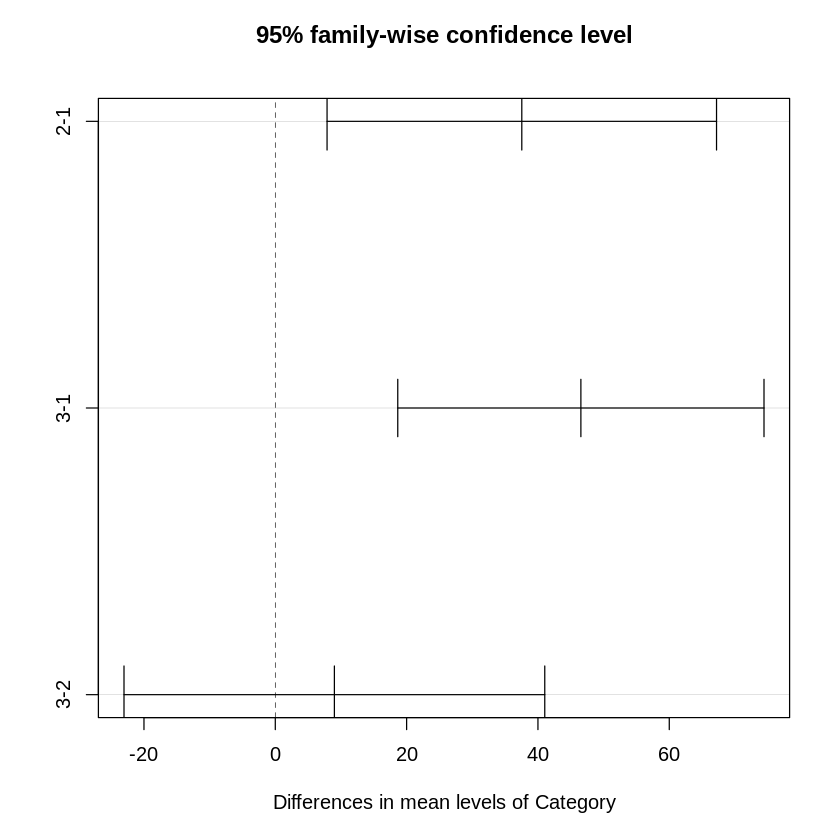

In [ ]:
# Kiểm định trung bình giữa các nhóm
with(rm_outliner_data, pairwise.t.test(like, Category, p.adj = "bonferroni"))
TukeyHSD(aov(like~Category, data=rm_outliner_data), conf.level = 0.95)
plot(TukeyHSD(aov(like~Category, data=rm_outliner_data), conf.level = 0.95))

Giả định:
- Giả thuyết:
    + H0: Các giá trị trung bình giữa các cặp bằng nhau
    + H1: Các giá trị trung bình giữa các cặp không bằng nhau
- Nhìn vào kết quả ta có:
    - Cặp 2-1 và 3-1 không có mean bằng nhau (đồ thị ko cắt điểm 0, p-value > 0.05)
    - Cặp 3-2 có mean bằng nhau (đồ thị cắt điểm 0, p-value < 0.05)

#####  Phân tích ảnh hưởng chính của Quảng cáo với hiệu quả của bài post thông qua số lượt like
Gồm các bước sau:
- Xây dựng mô hình
- Kiểm định các giả thiết của mô hình
- Kiểm định trung bình của các nhóm
- Nhận xét

In [ ]:
paid_model = lm(like~Paid, data = rm_outliner_data)
summary(paid_model)


Call:
lm(formula = like ~ Paid, data = rm_outliner_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-148.43  -71.43  -29.55   40.70  430.57 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  118.546      5.996  19.770  < 2e-16 ***
Paid1         29.883     11.478   2.604  0.00954 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 106.8 on 434 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.01538,	Adjusted R-squared:  0.01311 
F-statistic: 6.779 on 1 and 434 DF,  p-value: 0.009542


Nhận xét: Với mức ý nghĩa 0.05, ta thấy rằng Paid có ý nghĩa trong việc giải thích mô hình


	Shapiro-Wilk normality test

data:  av_residual
W = 0.86594, p-value < 2.2e-16


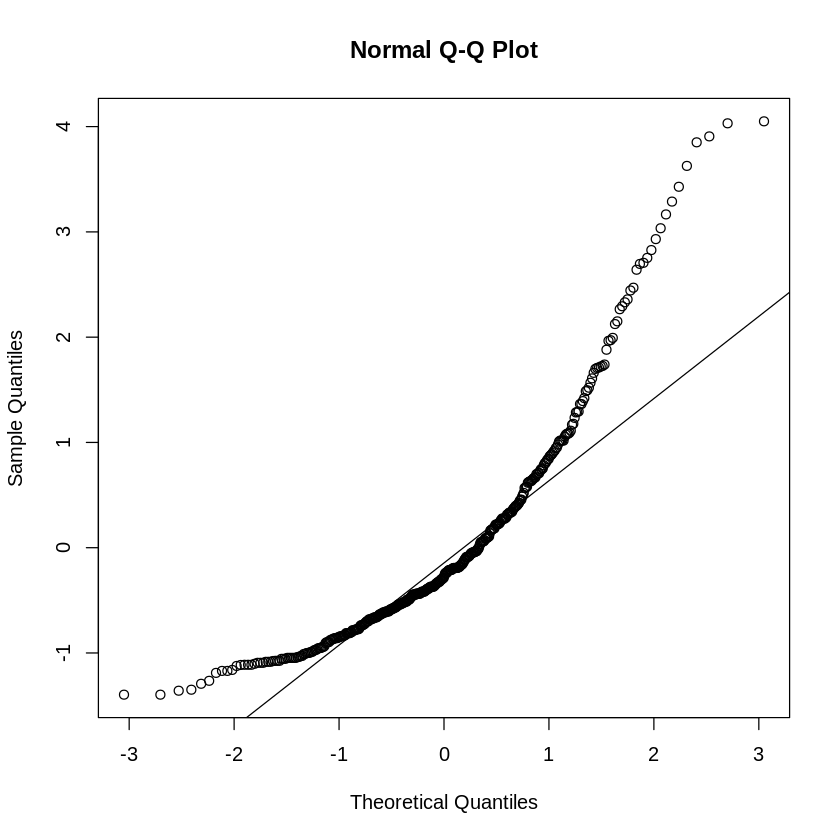

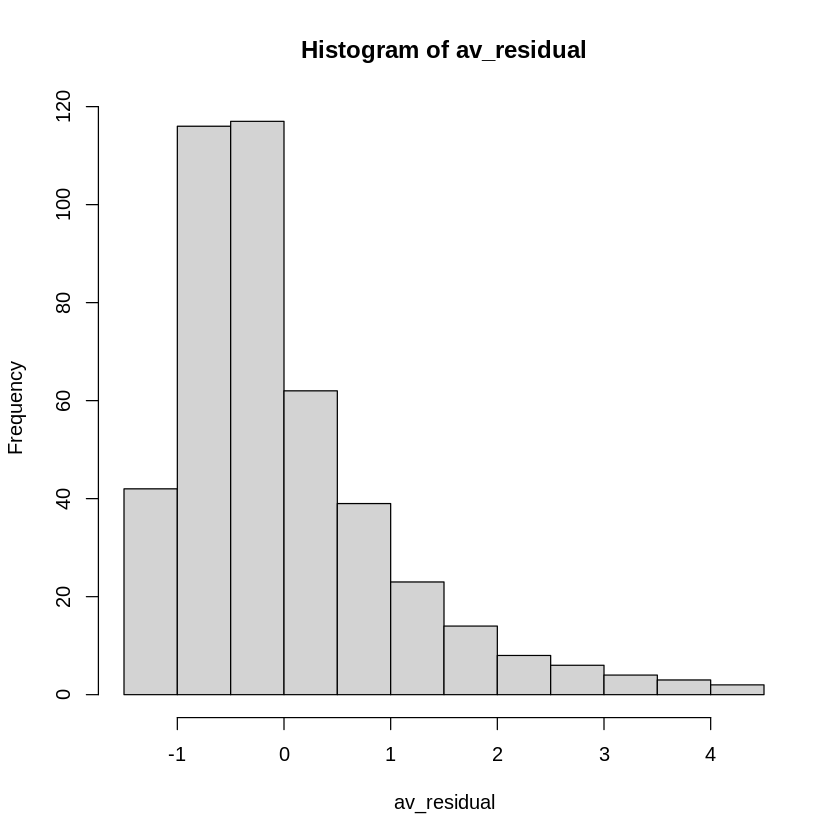

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(paid_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 2.2e-16 chúng ta đủ cơ sở bác bỏ H0, vậy sai số có phân phối không chuẩn. (Giống kết quả trước đó), tuy nhiên về biểu đồ phân phối cho ta kết quả đẹp hơn

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(paid_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.750614,0.09793961
,434,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 0.097 > 0.05, ta không đủ điều kiện bác bỏ H0, vậy các nhóm có phương sai đồng nhất (giống cũ)

 lag Autocorrelation D-W Statistic p-value
   1       0.0272626      1.945027    0.57
 Alternative hypothesis: rho != 0

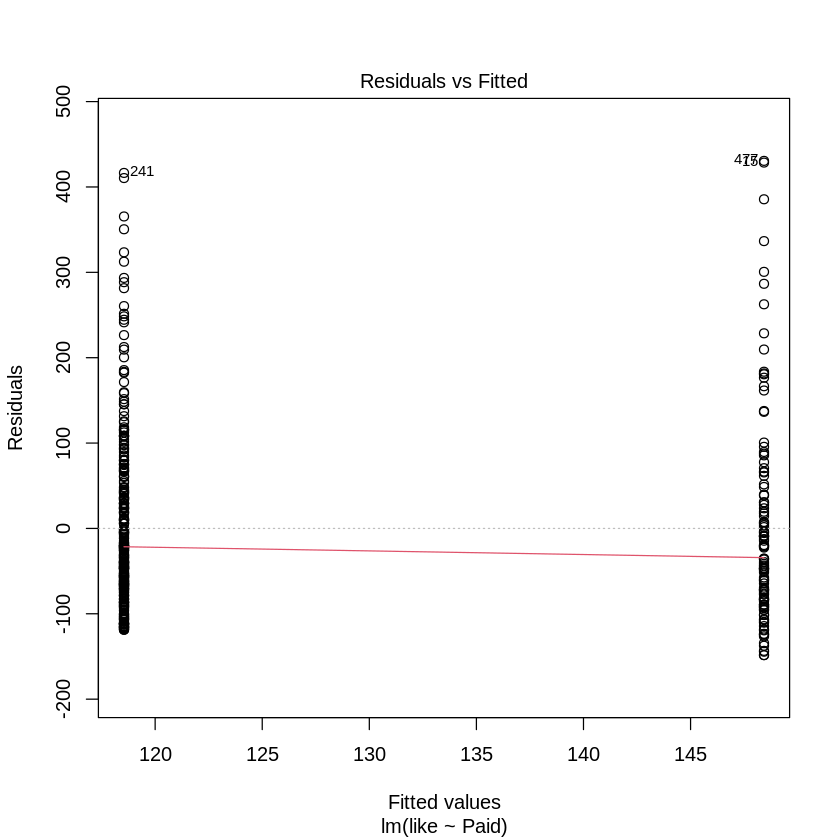

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(paid_model)
plot(paid_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.57 nên không có sự tương quan (trước đó là 0.11).


	Pairwise comparisons using t tests with pooled SD 

data:  like and Paid 

  0     
1 0.0095

P value adjustment method: bonferroni 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = like ~ Paid, data = rm_outliner_data)

$Paid
        diff      lwr      upr     p adj
1-0 29.88283 7.324104 52.44156 0.0095422


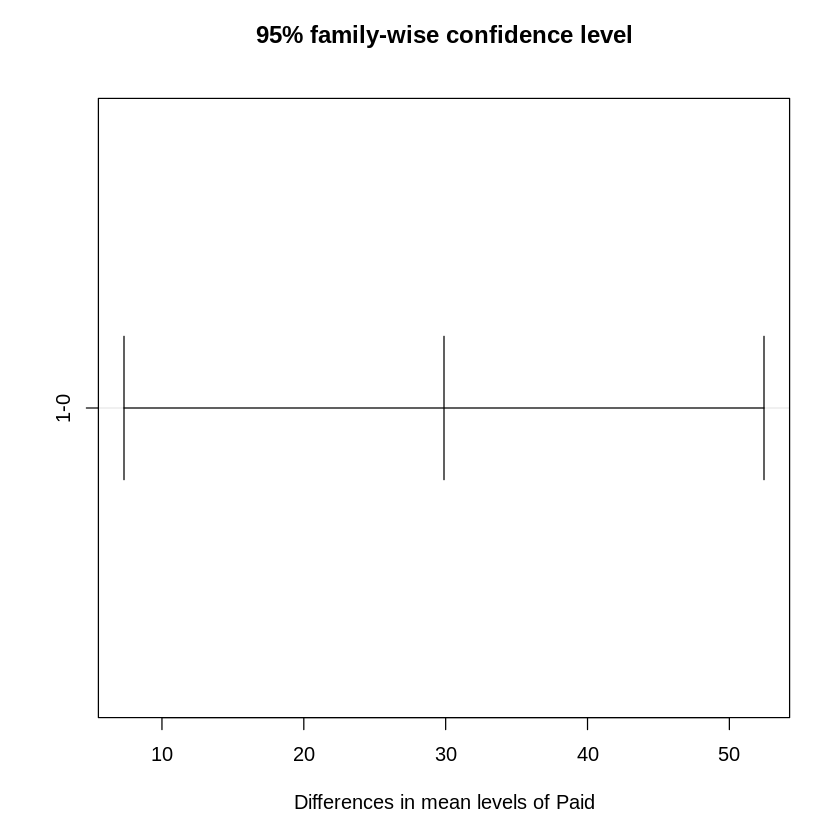

In [ ]:
# Kiểm định độ hiệu quả trung bình
with(rm_outliner_data, pairwise.t.test(like, Paid, p.adj = "bonferroni"))
TukeyHSD(aov(like~Paid, data=rm_outliner_data), conf.level = 0.95)
plot(TukeyHSD(aov(like~Paid, data=rm_outliner_data), conf.level = 0.95))

Giả định:
- Giả thuyết:
    + H0: Các giá trị trung bình giữa các cặp bằng nhau
    + H1: Các giá trị trung bình giữa các cặp không bằng nhau
- Nhìn vào kết quả ta có: Với p-value = 0.095 thì ta không đủ điều kiện bác bỏ H0, vậy 2 nhóm có mean bằng nhau.

### Xây dựng và kiểm định mô hình cộng (Additive model)
Gồm các bước sau:
- Xây dựng mô hình với các biến
- Kiểm định mô hình

In [ ]:
add_model = lm(like~., data=rm_outliner_data)
add_model <- MASS::stepAIC(add_model, k = log(nrow(rm_outliner_data)), trace = 0)
summary(add_model)
add_model$coefficients


Call:
lm(formula = like ~ Category + Paid, data = rm_outliner_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-161.14  -71.10  -32.51   44.18  453.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   93.882      8.192  11.460  < 2e-16 ***
Category2     40.209     12.586   3.195  0.00150 ** 
Category3     46.747     11.777   3.969 8.44e-05 ***
Paid1         31.510     11.283   2.793  0.00546 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 104.7 on 432 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.05703,	Adjusted R-squared:  0.05048 
F-statistic: 8.709 on 3 and 432 DF,  p-value: 1.275e-05


(Intercept)   Category2   Category3       Paid1 
   93.88172    40.20867    46.74703    31.50992

Nhận xét: Với p-value=5%, cả 2 biến đều có ý nghĩ trong việc giải thích mô hình. Ta tiến hành kiểm định  Shapiro và Breusch-Pagan


	Shapiro-Wilk normality test

data:  av_residual
W = 0.84237, p-value < 2.2e-16


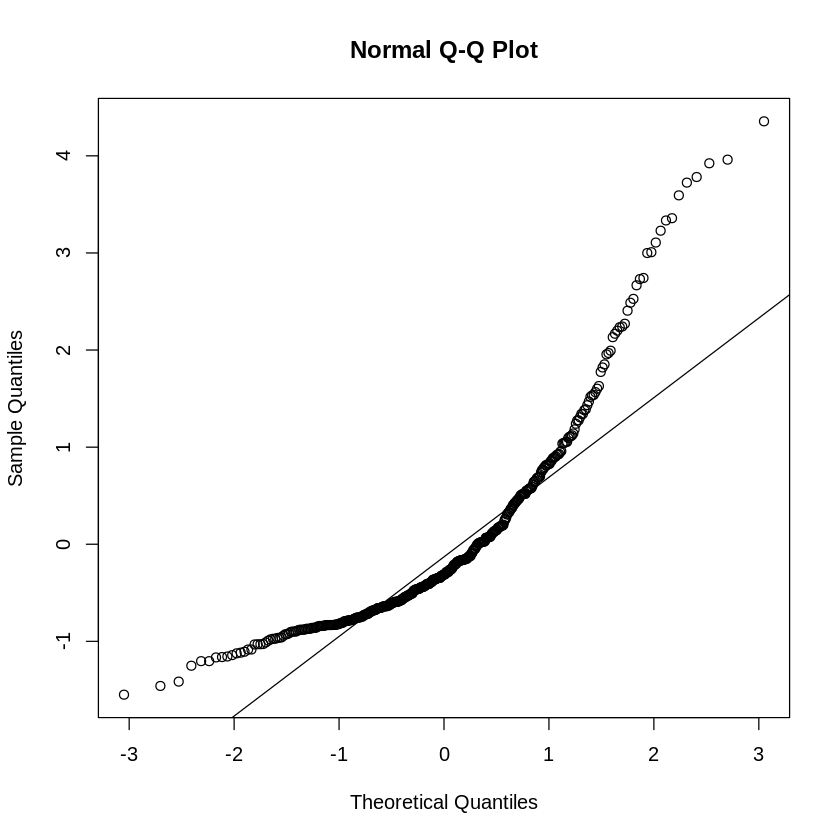

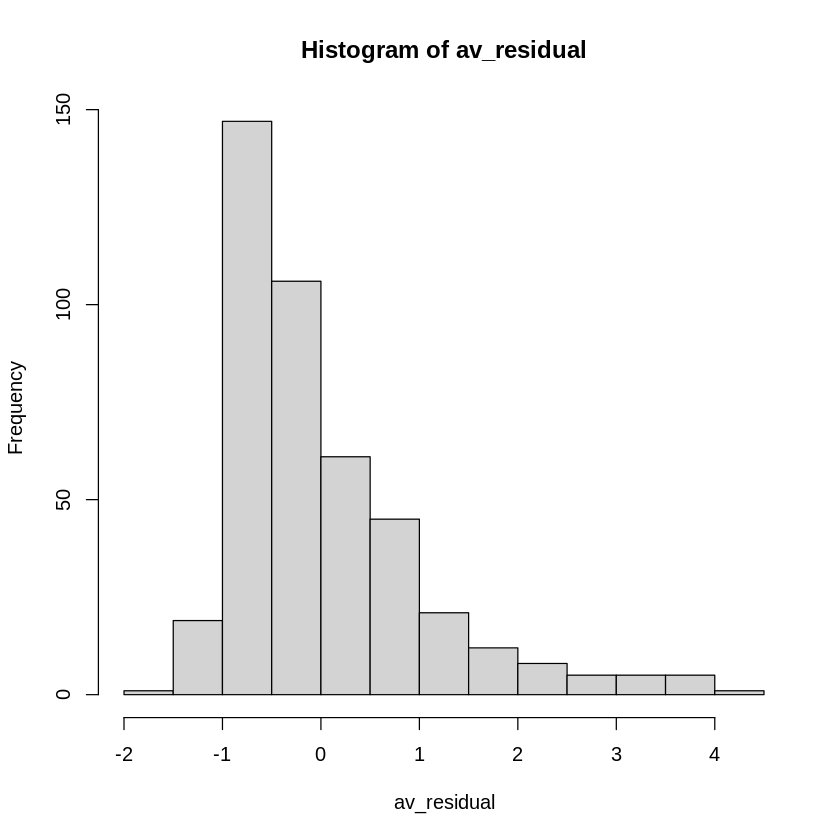

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(add_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 2.2e-16 chúng ta  đủ cơ sở bác H0, vậy phần dư không tuân theo chuẩn (giống trước).

 lag Autocorrelation D-W Statistic p-value
   1      0.02458993      1.950179   0.606
 Alternative hypothesis: rho != 0

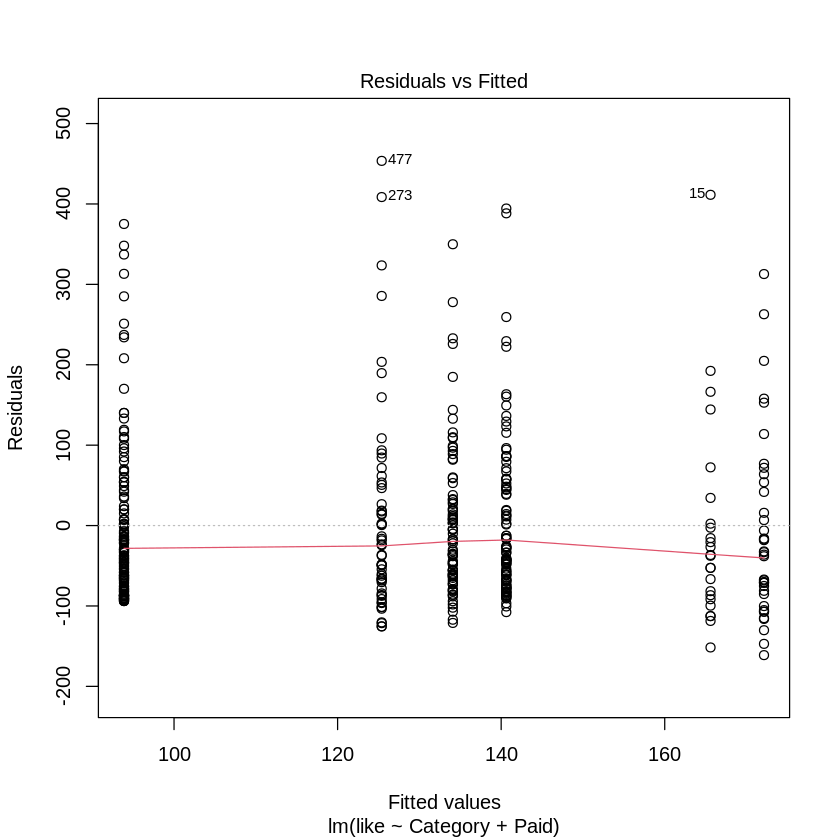

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(add_model)
plot(add_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.606 nên có sự tương quan dương, tuy nhiên kết quả tốt hơn trước (0.412).

In [ ]:
# Kiểm định  Breusch-Pagan
bptest(add_model)
add_model$coefficients


	studentized Breusch-Pagan test

data:  add_model
BP = 4.3594, df = 3, p-value = 0.2252


(Intercept)   Category2   Category3       Paid1 
   93.88172    40.20867    46.74703    31.50992

Giả định:
 - H0: phương sai không đổi
 - H1: phương sai thay đổi

 Với p-value=0.2252 > 0.05 thì ta không đủ điều kiện bác bỏ H0. Vậy phương sai của mô hình độc lập.

Như vậy, mô hình cộng được xây dựng như sau:
like=93.38 + 40.20×Category2 + 46.747xCategory3 + 31.51Paid1

- Category2 (40.21): Khi biến Category chuyển từ mức cơ bản (Category1) sang Category2, biến phụ thuộc tăng trung bình 40.21 đơn vị.
- Category3 (46.75): Khi biến Category chuyển từ mức cơ bản (Category1) sang Category3, biến phụ thuộc tăng trung bình 46.75 đơn vị.
- Paid1 (31.51): Khi biến Paid chuyển từ mức cơ bản (Paid0) sang Paid1, biến phụ thuộc tăng trung bình 31.51 đơn vị.

Kết luận: Như vậy để tăng tương tác bài viết, người dùng có thể dùng quảng cáo và nội dung liên quan đến chủ đề 2 v 3 (chủ đề 3 cho kết quả cao hơn).

**Như vậy về tổng thể sao khi loại bỏ các điểm ngoại lai và cực ngoại lai, về vieeck thống kê và phân tích ANOVA đã cho ra một mô hình có các yếu tố thỏa mãn các yếu tố kiểm định về chuẩn hơn, trong TH không chuẩn nhưng chỉ số so với trước là tốt hơn**
